# Chapter 9: Data Visualization

*Mathematics for Psychologists and Computation*

Data visualization is a critical skill in psychological research. Effective visualizations help us understand patterns in data, communicate findings clearly, and identify potential issues that might not be apparent from summary statistics alone. In this chapter, we'll explore various visualization techniques that are particularly useful for psychological data.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300

# Set random seed for reproducibility
np.random.seed(42)

## 1. The Importance of Data Visualization

Before diving into specific visualization techniques, let's understand why data visualization is so important in psychological research:

1. **Pattern Recognition**: Humans are naturally skilled at recognizing visual patterns, making visualization an effective way to identify trends and relationships in data.

2. **Communication**: Well-designed visualizations can communicate complex findings more effectively than tables or text alone.

3. **Data Exploration**: Visualizations help in the exploratory phase of research, generating hypotheses and identifying unexpected patterns.

4. **Data Quality Assessment**: Visualizations can reveal outliers, missing values, and other data quality issues.

5. **Understanding Distributions**: Visualizations help us understand the shape, center, and spread of our data distributions.

Let's start with a classic example that demonstrates the importance of visualization: Anscombe's Quartet.

In [2]:
# Load Anscombe's Quartet dataset
anscombe = sns.load_dataset("anscombe")

# Calculate summary statistics for each dataset
summary_stats = anscombe.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std', 'count']
})

# Calculate correlation for each dataset
correlations = anscombe.groupby('dataset').apply(lambda x: x['x'].corr(x['y']).round(2))
summary_stats['correlation'] = correlations

print("Summary Statistics for Anscombe's Quartet:")
print(summary_stats)

Summary Statistics for Anscombe's Quartet:
           x                   y                 correlation
        mean       std      mean       std count            
dataset                                                     
I        9.0  3.316625  7.500909  2.031568    11        0.82
II       9.0  3.316625  7.500909  2.031657    11        0.82
III      9.0  3.316625  7.500000  2.030424    11        0.82
IV       9.0  3.316625  7.500909  2.030579    11        0.82


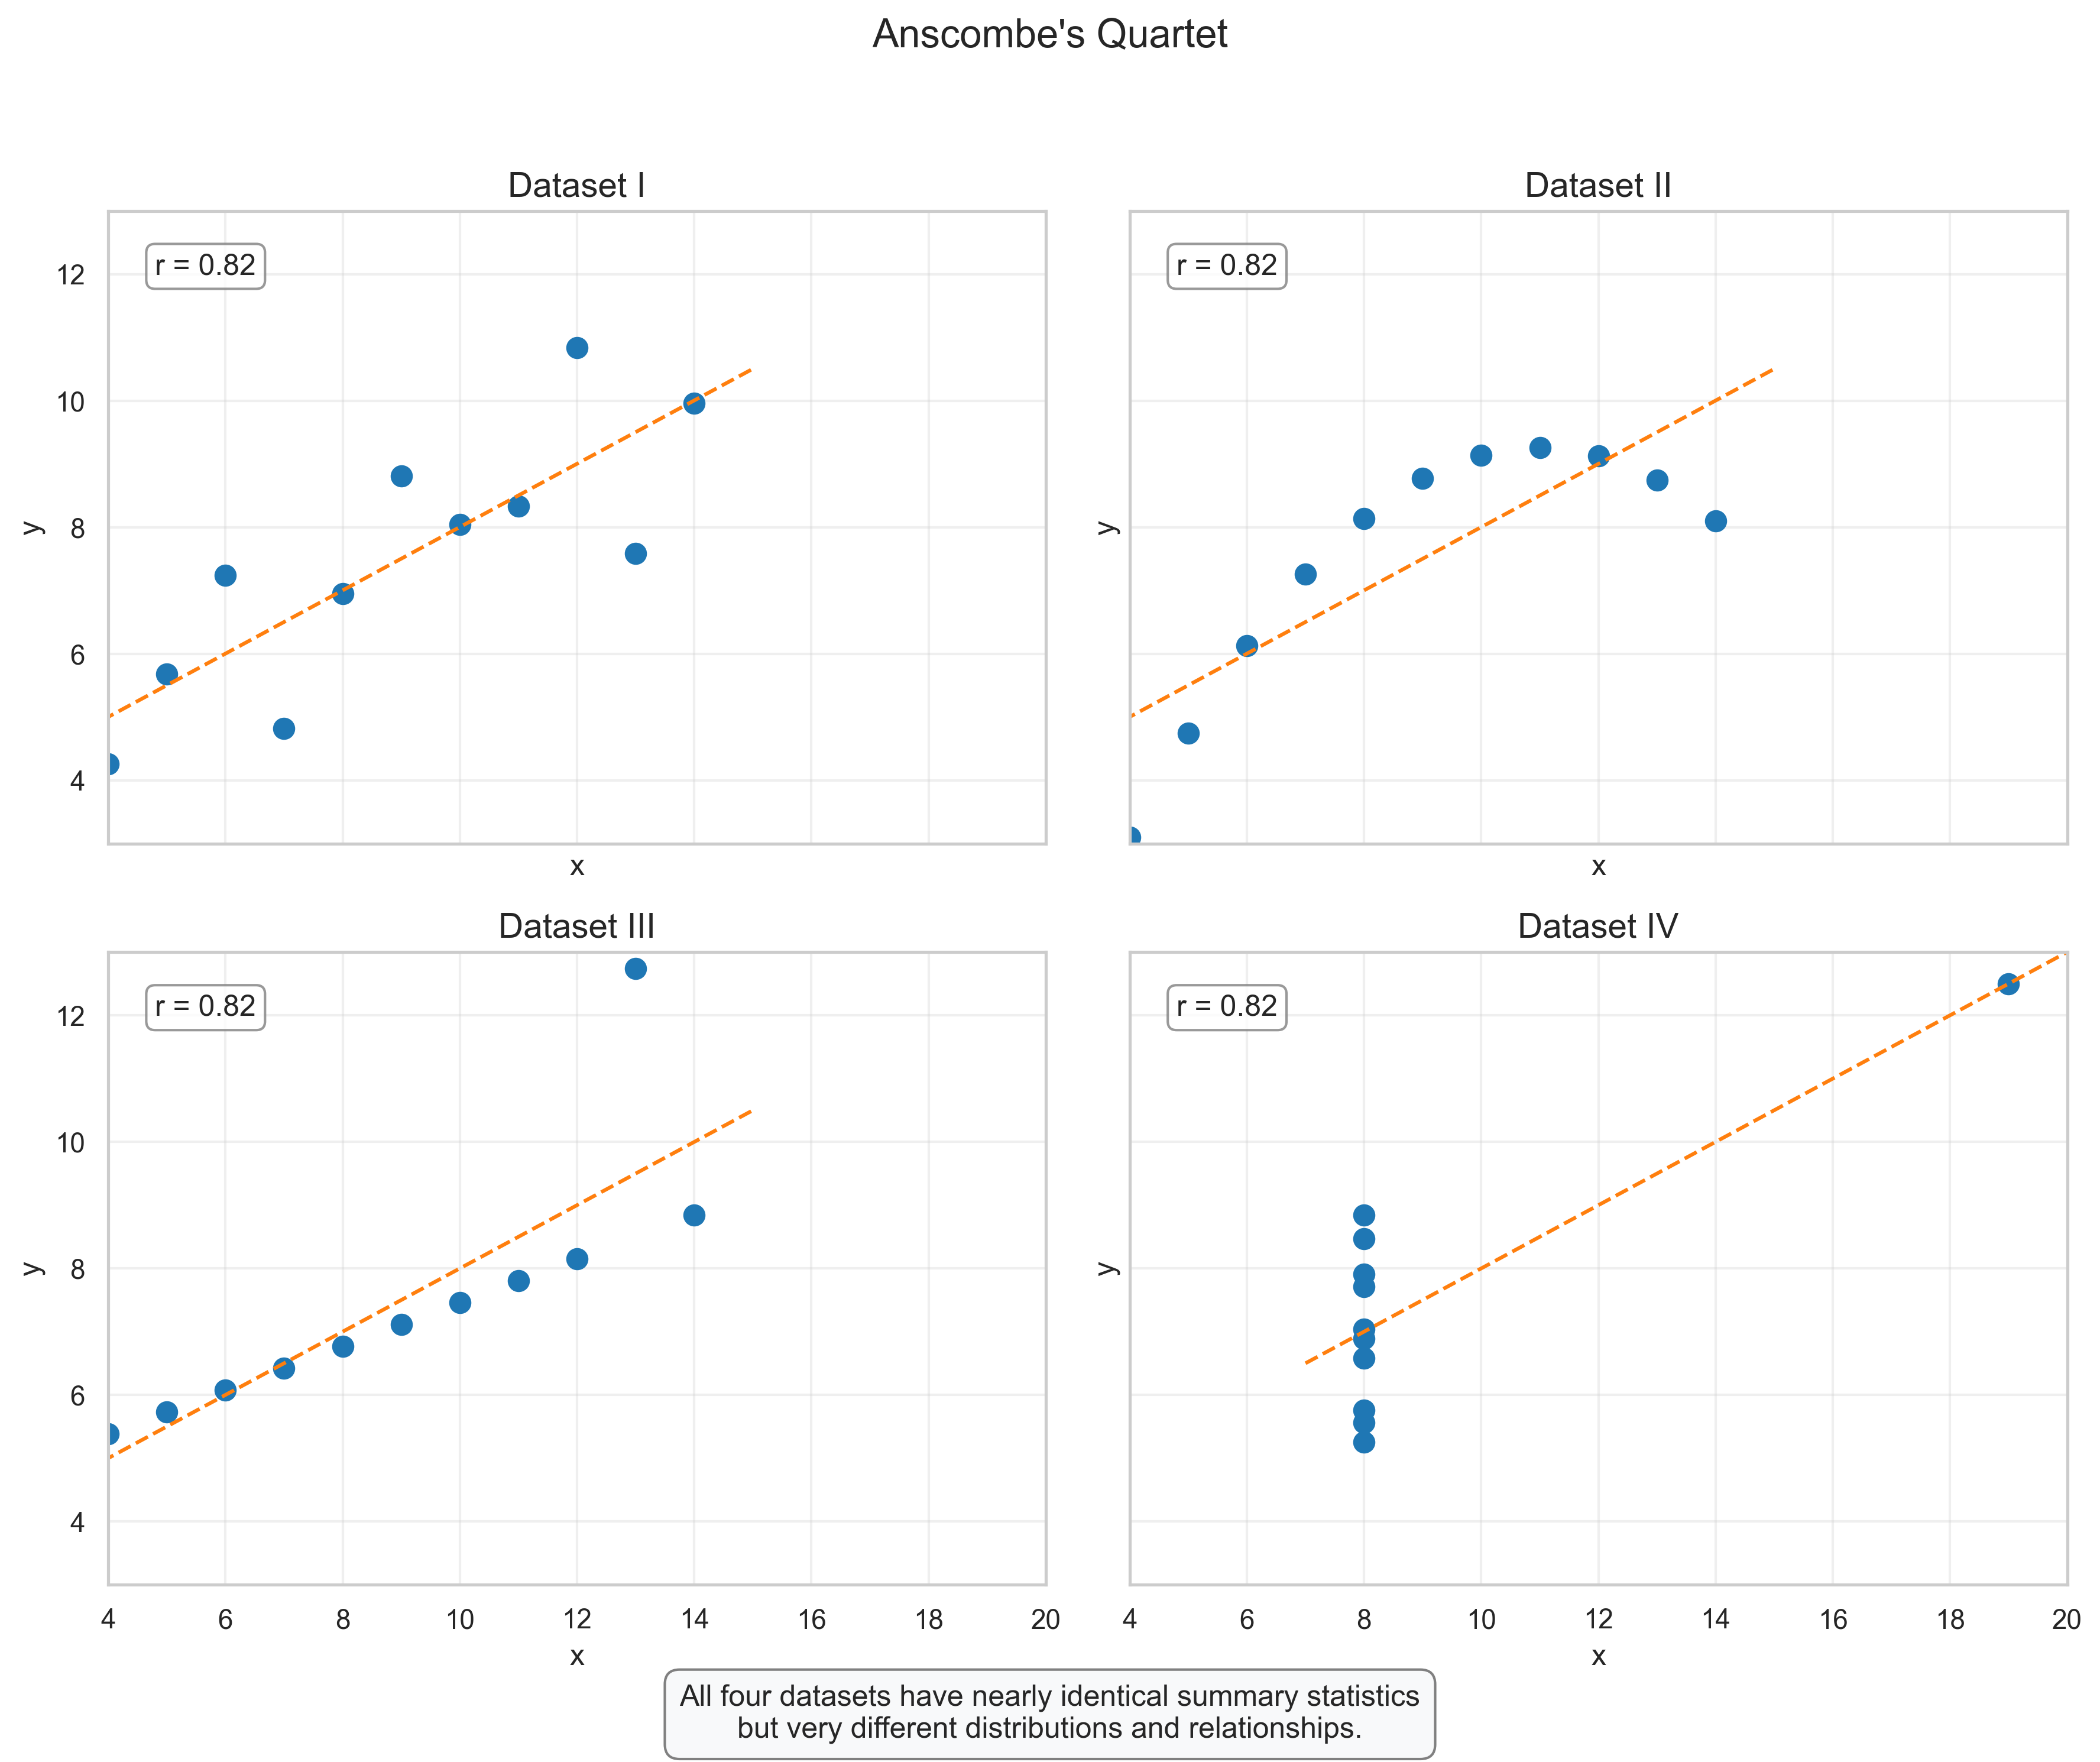

In [3]:
# Visualize Anscombe's Quartet
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each dataset
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    # Get data for the current dataset
    data = anscombe[anscombe['dataset'] == dataset]
    
    # Plot the data points
    axes[i].plot(data['x'], data['y'], 'o', color='#1f77b4', markersize=8)
    
    # Add regression line
    x_line = np.linspace(data['x'].min() - 1, data['x'].max() + 1, 100)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
    y_line = intercept + slope * x_line
    axes[i].plot(x_line, y_line, color='#ff7f0e', linestyle='--')
    
    # Add title and correlation information
    axes[i].set_title(f"Dataset {dataset}", fontsize=14)
    axes[i].annotate(f"r = {r_value:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', 
                    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Set axis limits
    axes[i].set_xlim(4, 20)
    axes[i].set_ylim(3, 13)
    
    # Add grid
    axes[i].grid(True, alpha=0.3)
    
    # Add axis labels
    axes[i].set_xlabel('x', fontsize=12)
    axes[i].set_ylabel('y', fontsize=12)

plt.suptitle("Anscombe's Quartet", fontsize=16, y=0.98)
plt.figtext(0.5, 0.01, "All four datasets have nearly identical summary statistics\nbut very different distributions and relationships.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Anscombe's Quartet: The Power of Visualization

Anscombe's Quartet, created by statistician Francis Anscombe in 1973, consists of four datasets that have nearly identical summary statistics (mean, variance, correlation, and linear regression line), but look completely different when visualized. This example powerfully demonstrates why we should always visualize our data rather than relying solely on summary statistics.

**Interpretation:**

- **Dataset I**: Shows a typical linear relationship with some random variation around the regression line.
- **Dataset II**: Reveals a clear non-linear relationship that would be missed if we only looked at the correlation coefficient.
- **Dataset III**: Shows a perfect linear relationship except for one outlier that significantly affects the regression line.
- **Dataset IV**: Demonstrates how a single extreme value (outlier) can determine the correlation coefficient, despite there being no relationship between variables for most data points.

**Key Insight**: Always visualize your data before drawing conclusions based on summary statistics alone. Different data patterns can produce identical summary statistics but require very different interpretations and statistical approaches.

## 2. Visualizing Distributions

Understanding the distribution of variables is a fundamental step in data analysis. In psychology, we often need to examine the distribution of scores on psychological measures, reaction times, or other continuous variables. Let's explore several techniques for visualizing distributions.

In [4]:
# Generate sample data for a psychological measure (e.g., depression scores)
# Create a slightly skewed distribution to reflect real-world psychological data
n_participants = 200
depression_scores = np.random.gamma(shape=5, scale=2, size=n_participants)

# Create a DataFrame
df_depression = pd.DataFrame({
    'Depression Score': depression_scores,
    'Gender': np.random.choice(['Male', 'Female'], size=n_participants, p=[0.45, 0.55])
})

# Calculate summary statistics
summary = df_depression['Depression Score'].describe()
print("Summary Statistics for Depression Scores:")
print(summary)

Summary Statistics for Depression Scores:
count    200.000000
mean      10.166489
std        4.476827
min        1.165698
25%        7.001490
50%        9.614344
75%       12.477061
max       37.835691
Name: Depression Score, dtype: float64


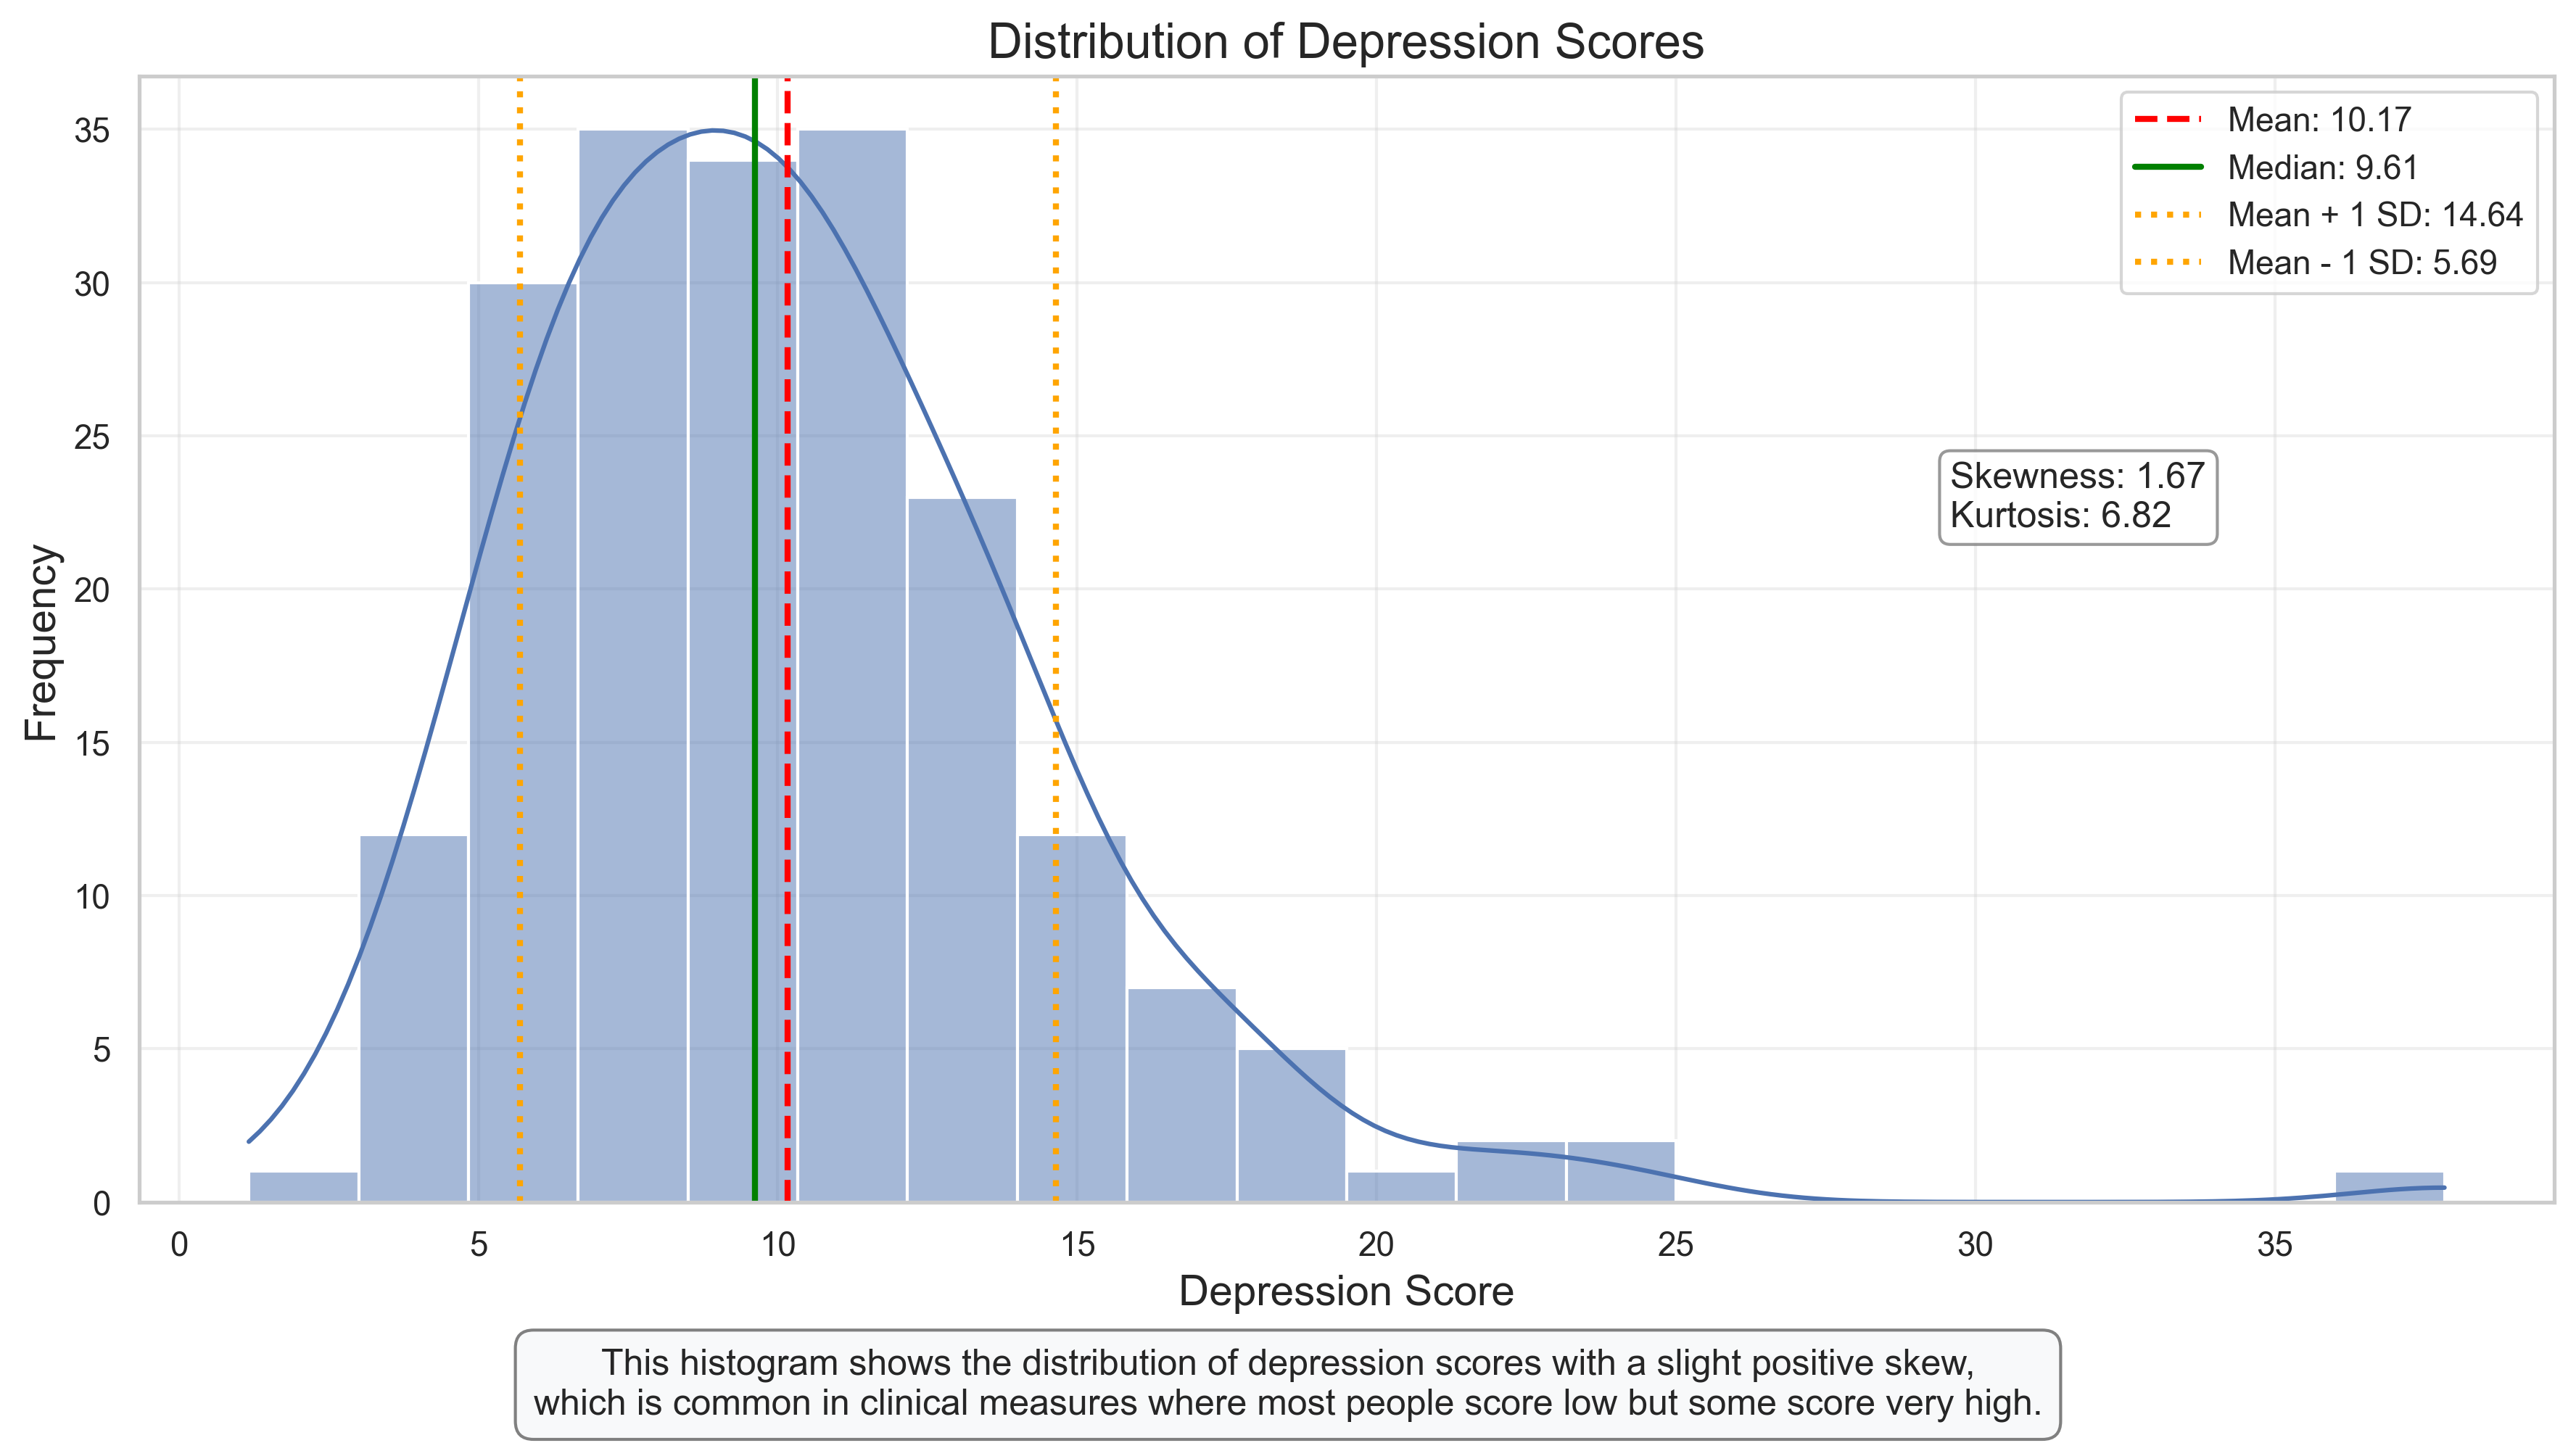

In [5]:
# Histogram: Basic Distribution Visualization
plt.figure(figsize=(12, 7))

# Create histogram with KDE
sns.histplot(df_depression['Depression Score'], kde=True, bins=20, color='#4c72b0')

# Add vertical lines for key statistics
plt.axvline(summary['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {summary['mean']:.2f}")
plt.axvline(summary['50%'], color='green', linestyle='-', linewidth=2, label=f"Median: {summary['50%']:.2f}")
plt.axvline(summary['mean'] + summary['std'], color='orange', linestyle=':', linewidth=2, label=f"Mean + 1 SD: {summary['mean'] + summary['std']:.2f}")
plt.axvline(summary['mean'] - summary['std'], color='orange', linestyle=':', linewidth=2, label=f"Mean - 1 SD: {summary['mean'] - summary['std']:.2f}")

# Add annotations
skewness = stats.skew(df_depression['Depression Score'])
kurtosis = stats.kurtosis(df_depression['Depression Score'])
plt.annotate(f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}", 
             xy=(0.75, 0.60), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add title and labels
plt.title("Distribution of Depression Scores", fontsize=16)
plt.xlabel("Depression Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

# Add explanatory text
plt.figtext(0.5, 0.01, "This histogram shows the distribution of depression scores with a slight positive skew,\n"
                      "which is common in clinical measures where most people score low but some score very high.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Histogram: Understanding the Distribution of Depression Scores

The histogram above visualizes the distribution of depression scores in our sample. This type of plot is fundamental for understanding the shape, center, and spread of a distribution.

**Key Features to Observe:**

1. **Shape**: The distribution shows a positive (right) skew, which is common in clinical measures. Most participants have relatively low scores, with fewer participants having very high scores.

2. **Central Tendency**: The mean (red dashed line) is slightly higher than the median (green solid line), which is characteristic of right-skewed distributions.

3. **Spread**: The orange dotted lines show one standard deviation above and below the mean, encompassing approximately 68% of the data (assuming a normal distribution).

4. **Skewness and Kurtosis**: The positive skewness value confirms the right-skewed nature of the distribution. Kurtosis indicates whether the distribution has heavier or lighter tails than a normal distribution.

**Interpretation for Psychological Research:**
- The positive skew suggests that while most people report relatively low levels of depression, there are some individuals with notably higher scores.
- This pattern is typical for clinical measures in non-clinical populations, where pathology is the exception rather than the norm.
- The skewed nature of the distribution might influence our choice of statistical tests, potentially favoring non-parametric approaches if the skew is severe.

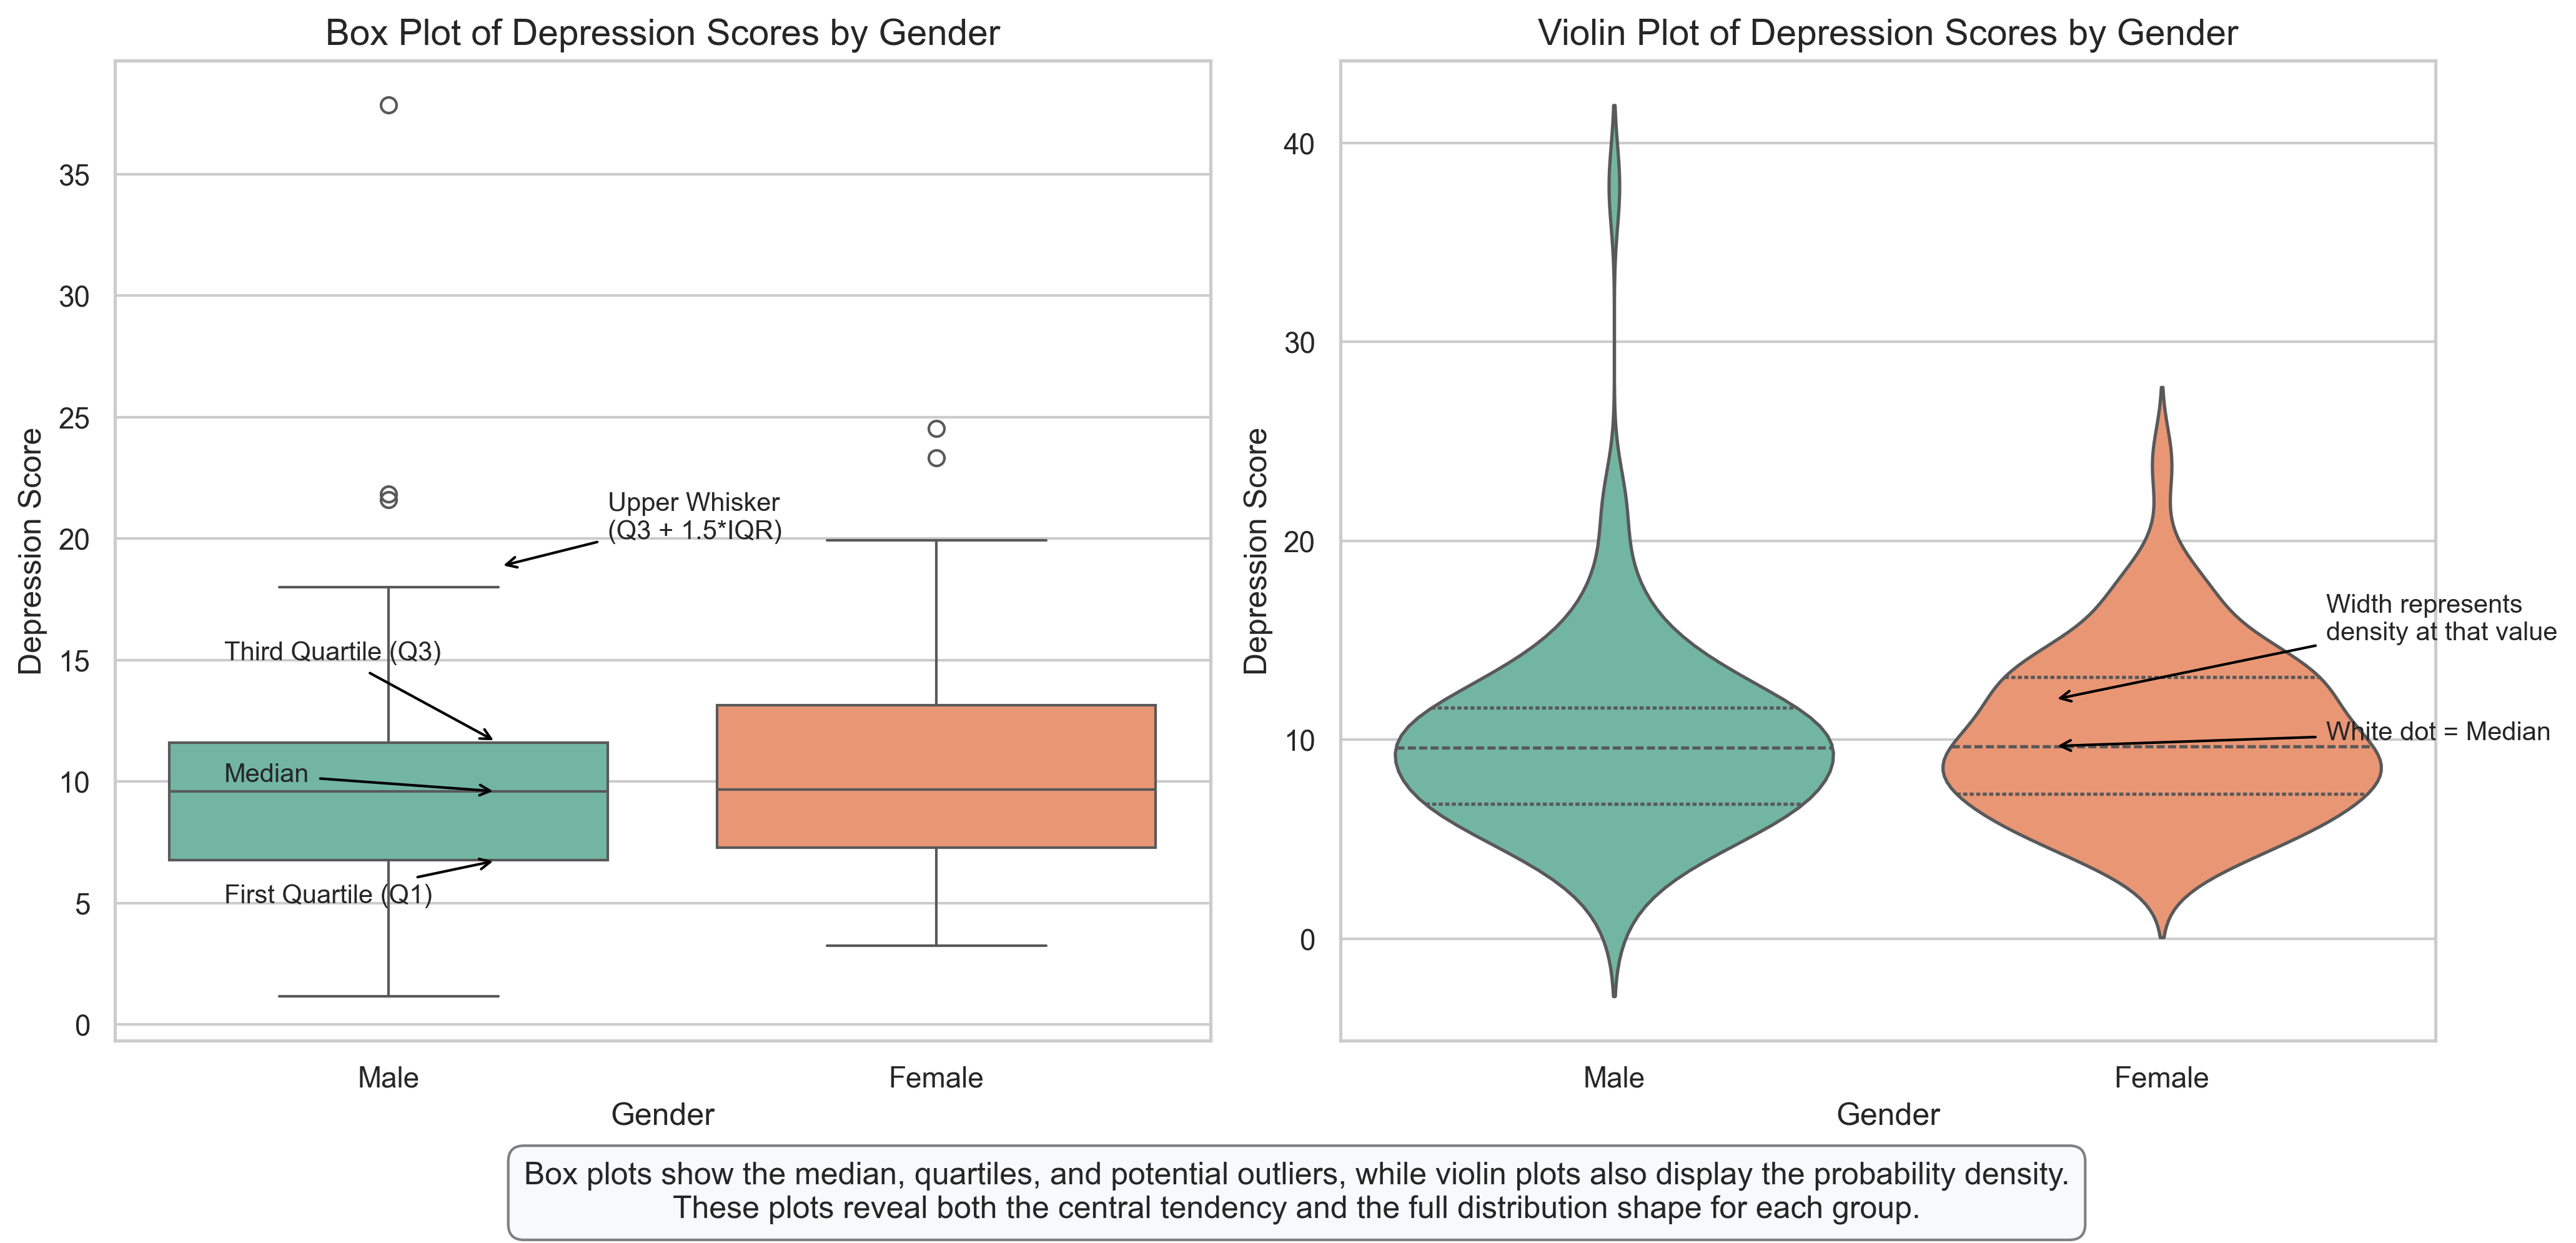

Group Statistics:
             mean    median       std  count
Gender                                      
Female  10.325059  9.673599  4.130648    116
Male     9.947512  9.591536  4.932373     84


In [6]:
# Box Plot and Violin Plot: Comparing Distributions by Group
plt.figure(figsize=(14, 7))

# Create a side-by-side comparison with two subplots
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Depression Score', data=df_depression, palette='Set2')
plt.title('Box Plot of Depression Scores by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Depression Score', fontsize=12)

# Add annotations for boxplot components
plt.annotate('Upper Whisker\n(Q3 + 1.5*IQR)', xy=(0.2, df_depression[df_depression['Gender']=='Male']['Depression Score'].quantile(0.75) + 
                                              1.5*(df_depression[df_depression['Gender']=='Male']['Depression Score'].quantile(0.75) - 
                                                  df_depression[df_depression['Gender']=='Male']['Depression Score'].quantile(0.25))),
             xytext=(0.4, 20), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

plt.annotate('Third Quartile (Q3)', xy=(0.2, df_depression[df_depression['Gender']=='Male']['Depression Score'].quantile(0.75)),
             xytext=(-0.3, 15), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

plt.annotate('Median', xy=(0.2, df_depression[df_depression['Gender']=='Male']['Depression Score'].median()),
             xytext=(-0.3, 10), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

plt.annotate('First Quartile (Q1)', xy=(0.2, df_depression[df_depression['Gender']=='Male']['Depression Score'].quantile(0.25)),
             xytext=(-0.3, 5), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Gender', y='Depression Score', data=df_depression, palette='Set2', inner='quartile')
plt.title('Violin Plot of Depression Scores by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Depression Score', fontsize=12)

# Add annotation for violin plot interpretation
plt.annotate('Width represents\ndensity at that value', xy=(0.8, 12),
             xytext=(1.3, 15), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

plt.annotate('White dot = Median', xy=(0.8, df_depression[df_depression['Gender']=='Female']['Depression Score'].median()),
             xytext=(1.3, 10), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Add explanatory text
plt.figtext(0.5, 0.01, "Box plots show the median, quartiles, and potential outliers, while violin plots also display the probability density.\n"
                      "These plots reveal both the central tendency and the full distribution shape for each group.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# Calculate and print group statistics
group_stats = df_depression.groupby('Gender')['Depression Score'].agg(['mean', 'median', 'std', 'count'])
print("Group Statistics:")
print(group_stats)

### Box Plots and Violin Plots: Comparing Distributions Between Groups

These plots provide powerful ways to compare distributions between groups, in this case, depression scores between males and females.

**Box Plot Interpretation:**

A box plot (also called a box-and-whisker plot) displays the five-number summary of a distribution:
1. **Minimum** (lower whisker): The smallest value within 1.5 IQR of the first quartile
2. **First Quartile (Q1)**: 25% of scores fall below this value
3. **Median**: The middle value that divides the distribution in half
4. **Third Quartile (Q3)**: 75% of scores fall below this value
5. **Maximum** (upper whisker): The largest value within 1.5 IQR of the third quartile
6. **Outliers**: Individual points beyond the whiskers

**Violin Plot Interpretation:**

Violin plots combine the features of box plots with density plots:
- The width of the violin at any point represents the density of data at that value
- Wider sections indicate more observations at those values
- The internal markings show the median and quartiles

**What We Can See:**
- The distributions for both genders are slightly right-skewed
- Females show a slightly higher median depression score than males
- The spread (variability) appears similar between groups
- The violin plots reveal nuances in the distribution shapes that aren't visible in the box plots

**Research Implications:**
- These visualizations help researchers quickly identify potential gender differences in depression scores
- The overlapping distributions suggest that while there may be a small difference in central tendency, there's substantial overlap between groups
- The similar shapes of the distributions suggest that similar statistical approaches can be used for both groups

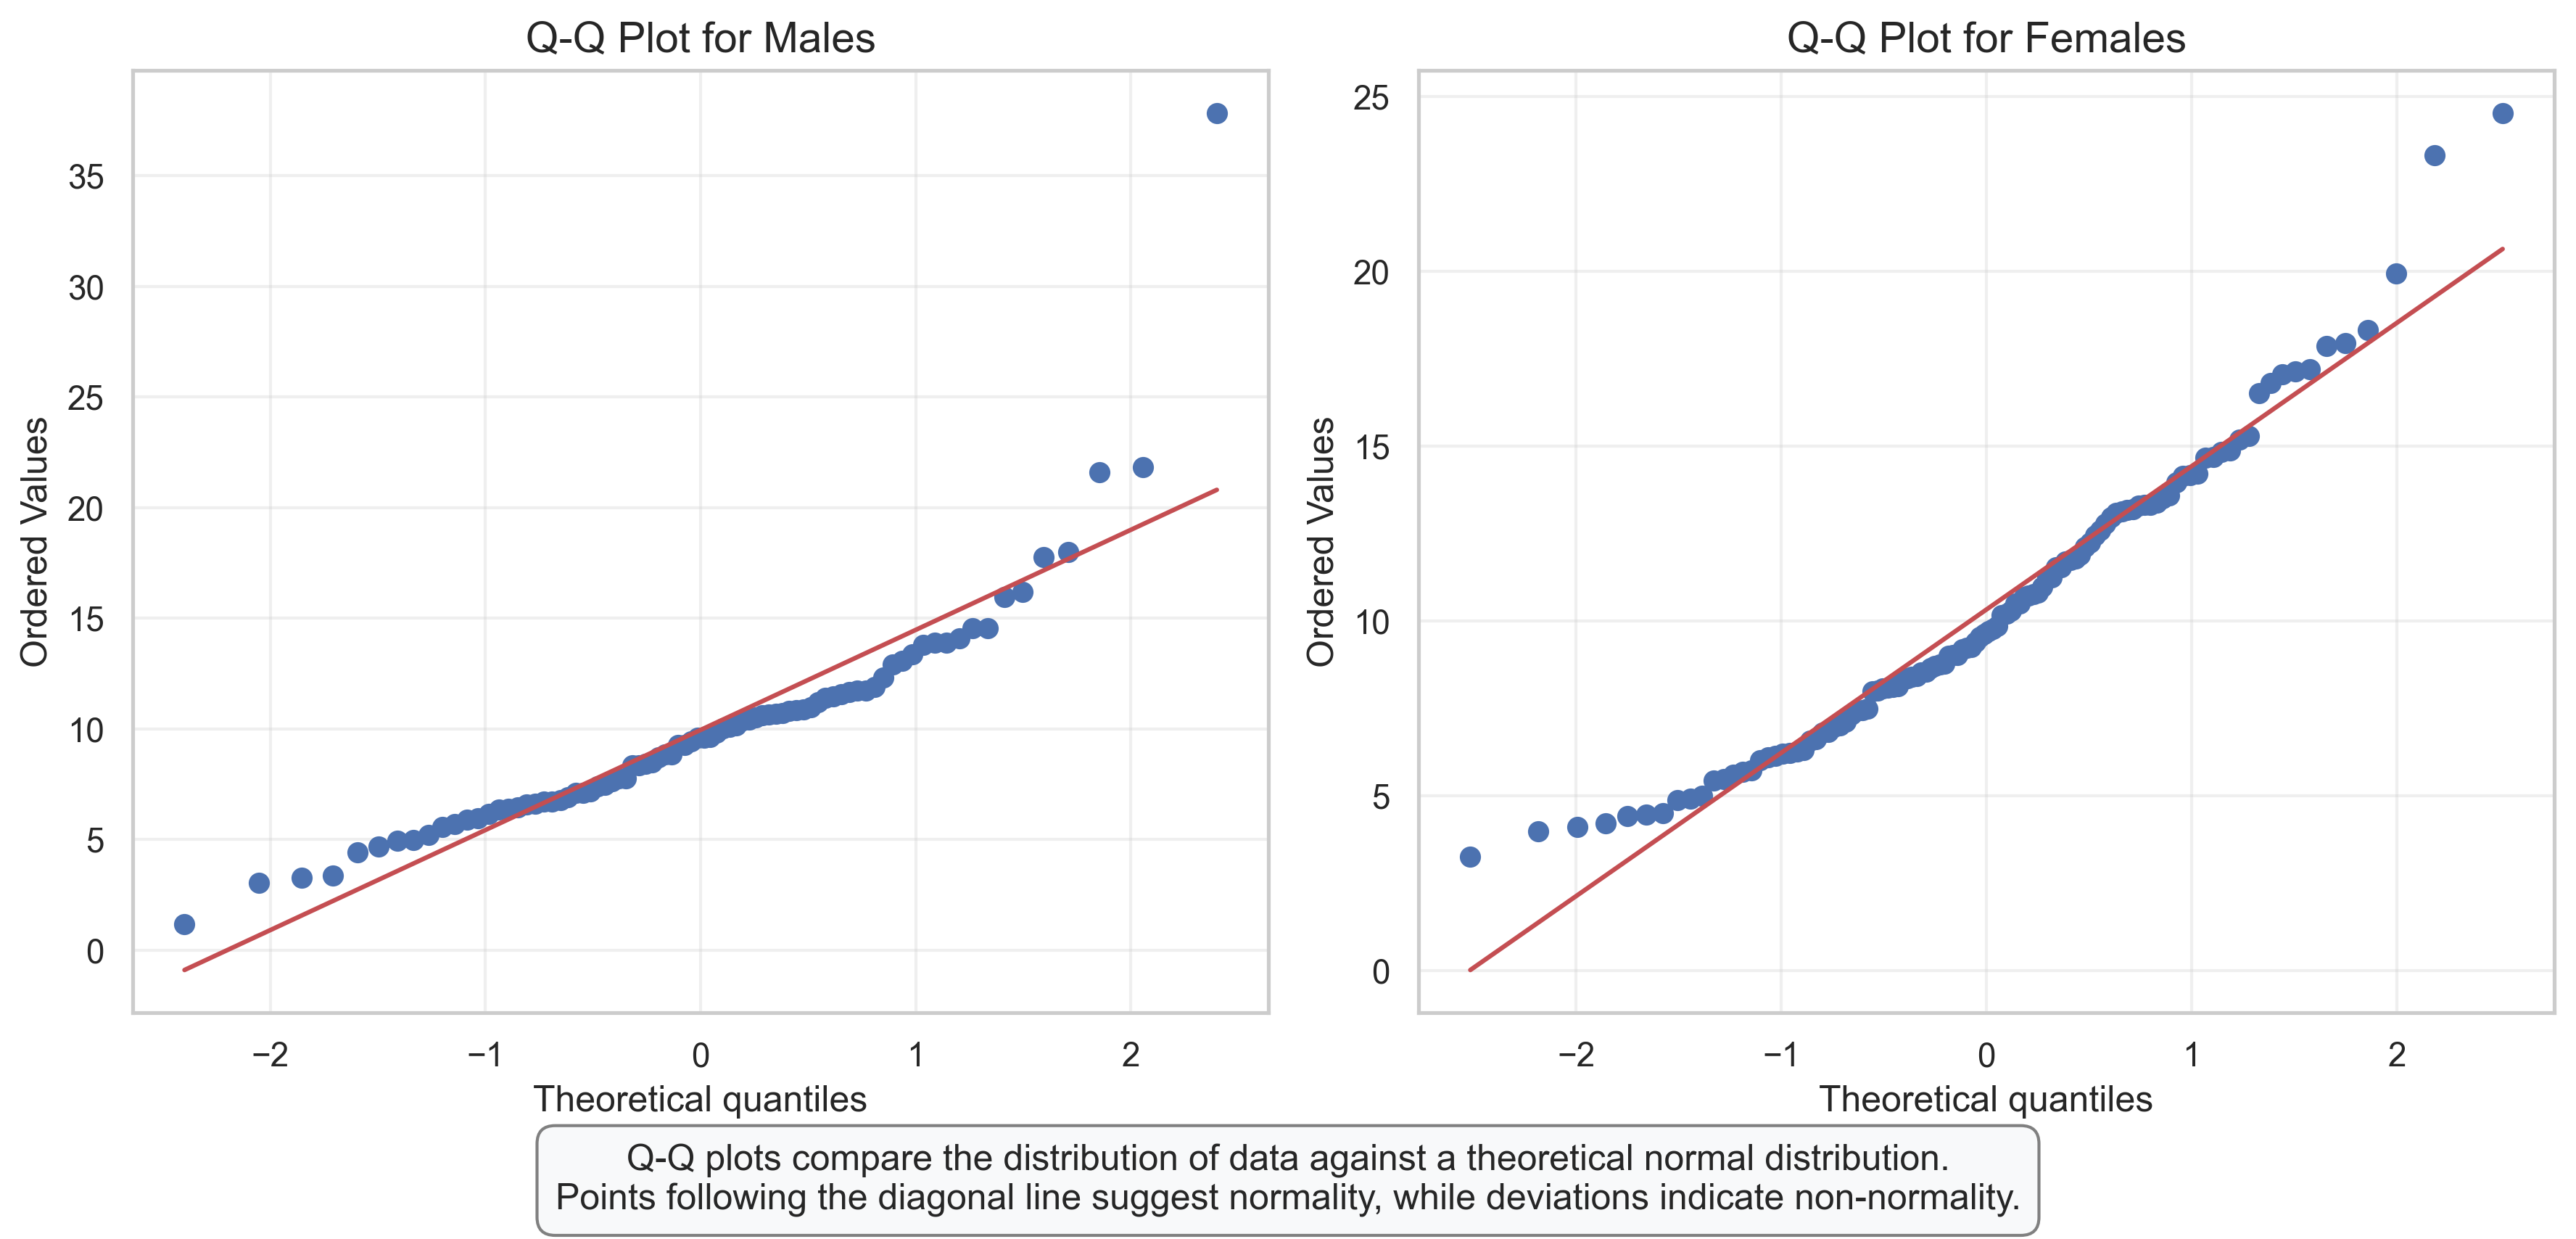

In [7]:
# Q-Q Plot: Assessing Normality
plt.figure(figsize=(12, 6))

# Create separate Q-Q plots for each gender
plt.subplot(1, 2, 1)
stats.probplot(df_depression[df_depression['Gender'] == 'Male']['Depression Score'], plot=plt)
plt.title('Q-Q Plot for Males', fontsize=14)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
stats.probplot(df_depression[df_depression['Gender'] == 'Female']['Depression Score'], plot=plt)
plt.title('Q-Q Plot for Females', fontsize=14)
plt.grid(alpha=0.3)

# Add explanatory text
plt.figtext(0.5, 0.01, "Q-Q plots compare the distribution of data against a theoretical normal distribution.\n"
                      "Points following the diagonal line suggest normality, while deviations indicate non-normality.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Q-Q Plots: Assessing Normality of Distributions

Q-Q (Quantile-Quantile) plots are powerful tools for assessing whether a dataset follows a normal distribution, which is an important assumption for many statistical tests used in psychological research.

**How to Read a Q-Q Plot:**

1. The x-axis shows the theoretical quantiles from a normal distribution
2. The y-axis shows the actual quantiles from our data
3. If the data follow a normal distribution, the points will fall approximately along the diagonal reference line
4. Deviations from the line indicate departures from normality

**Interpretation of Our Q-Q Plots:**

- **For Males**: The points follow the line reasonably well in the middle but deviate at the upper end (higher values), suggesting a right-skewed distribution
- **For Females**: A similar pattern is observed, with points deviating from the line at the upper end

**Common Patterns in Q-Q Plots:**

- **S-shaped curve**: Indicates skewness (our plots show this pattern)
- **Points above the line at both ends**: Indicates heavy tails (more extreme values than expected in a normal distribution)
- **Points below the line at both ends**: Indicates light tails (fewer extreme values than expected)

**Research Implications:**

- The slight deviations from normality might influence our choice of statistical tests
- For mild deviations, parametric tests might still be robust enough
- For more severe deviations, we might consider:
  - Data transformations (e.g., log transformation for right-skewed data)
  - Non-parametric alternatives
  - Robust statistical methods

## 3. Visualizing Relationships Between Variables

In psychological research, we're often interested in the relationships between variables. Let's explore various ways to visualize these relationships.

In [8]:
# Generate sample data for anxiety and performance
n_participants = 100

# Create anxiety scores (predictor variable)
anxiety_scores = np.random.normal(loc=5, scale=2, size=n_participants)

# Create performance scores with a negative relationship to anxiety plus some noise
# Higher anxiety → lower performance, with individual variation
noise = np.random.normal(loc=0, scale=15, size=n_participants)
performance_scores = 100 - 3 * anxiety_scores + noise

# Create a categorical variable for visualization
anxiety_level = pd.cut(anxiety_scores, bins=3, labels=['Low', 'Medium', 'High'])

# Create a DataFrame
df_anxiety = pd.DataFrame({
    'Anxiety': anxiety_scores,
    'Performance': performance_scores,
    'Anxiety Level': anxiety_level
})

# Calculate correlation
correlation = np.corrcoef(anxiety_scores, performance_scores)[0, 1]
print(f"Correlation between Anxiety and Performance: {correlation:.2f}")

Correlation between Anxiety and Performance: -0.41


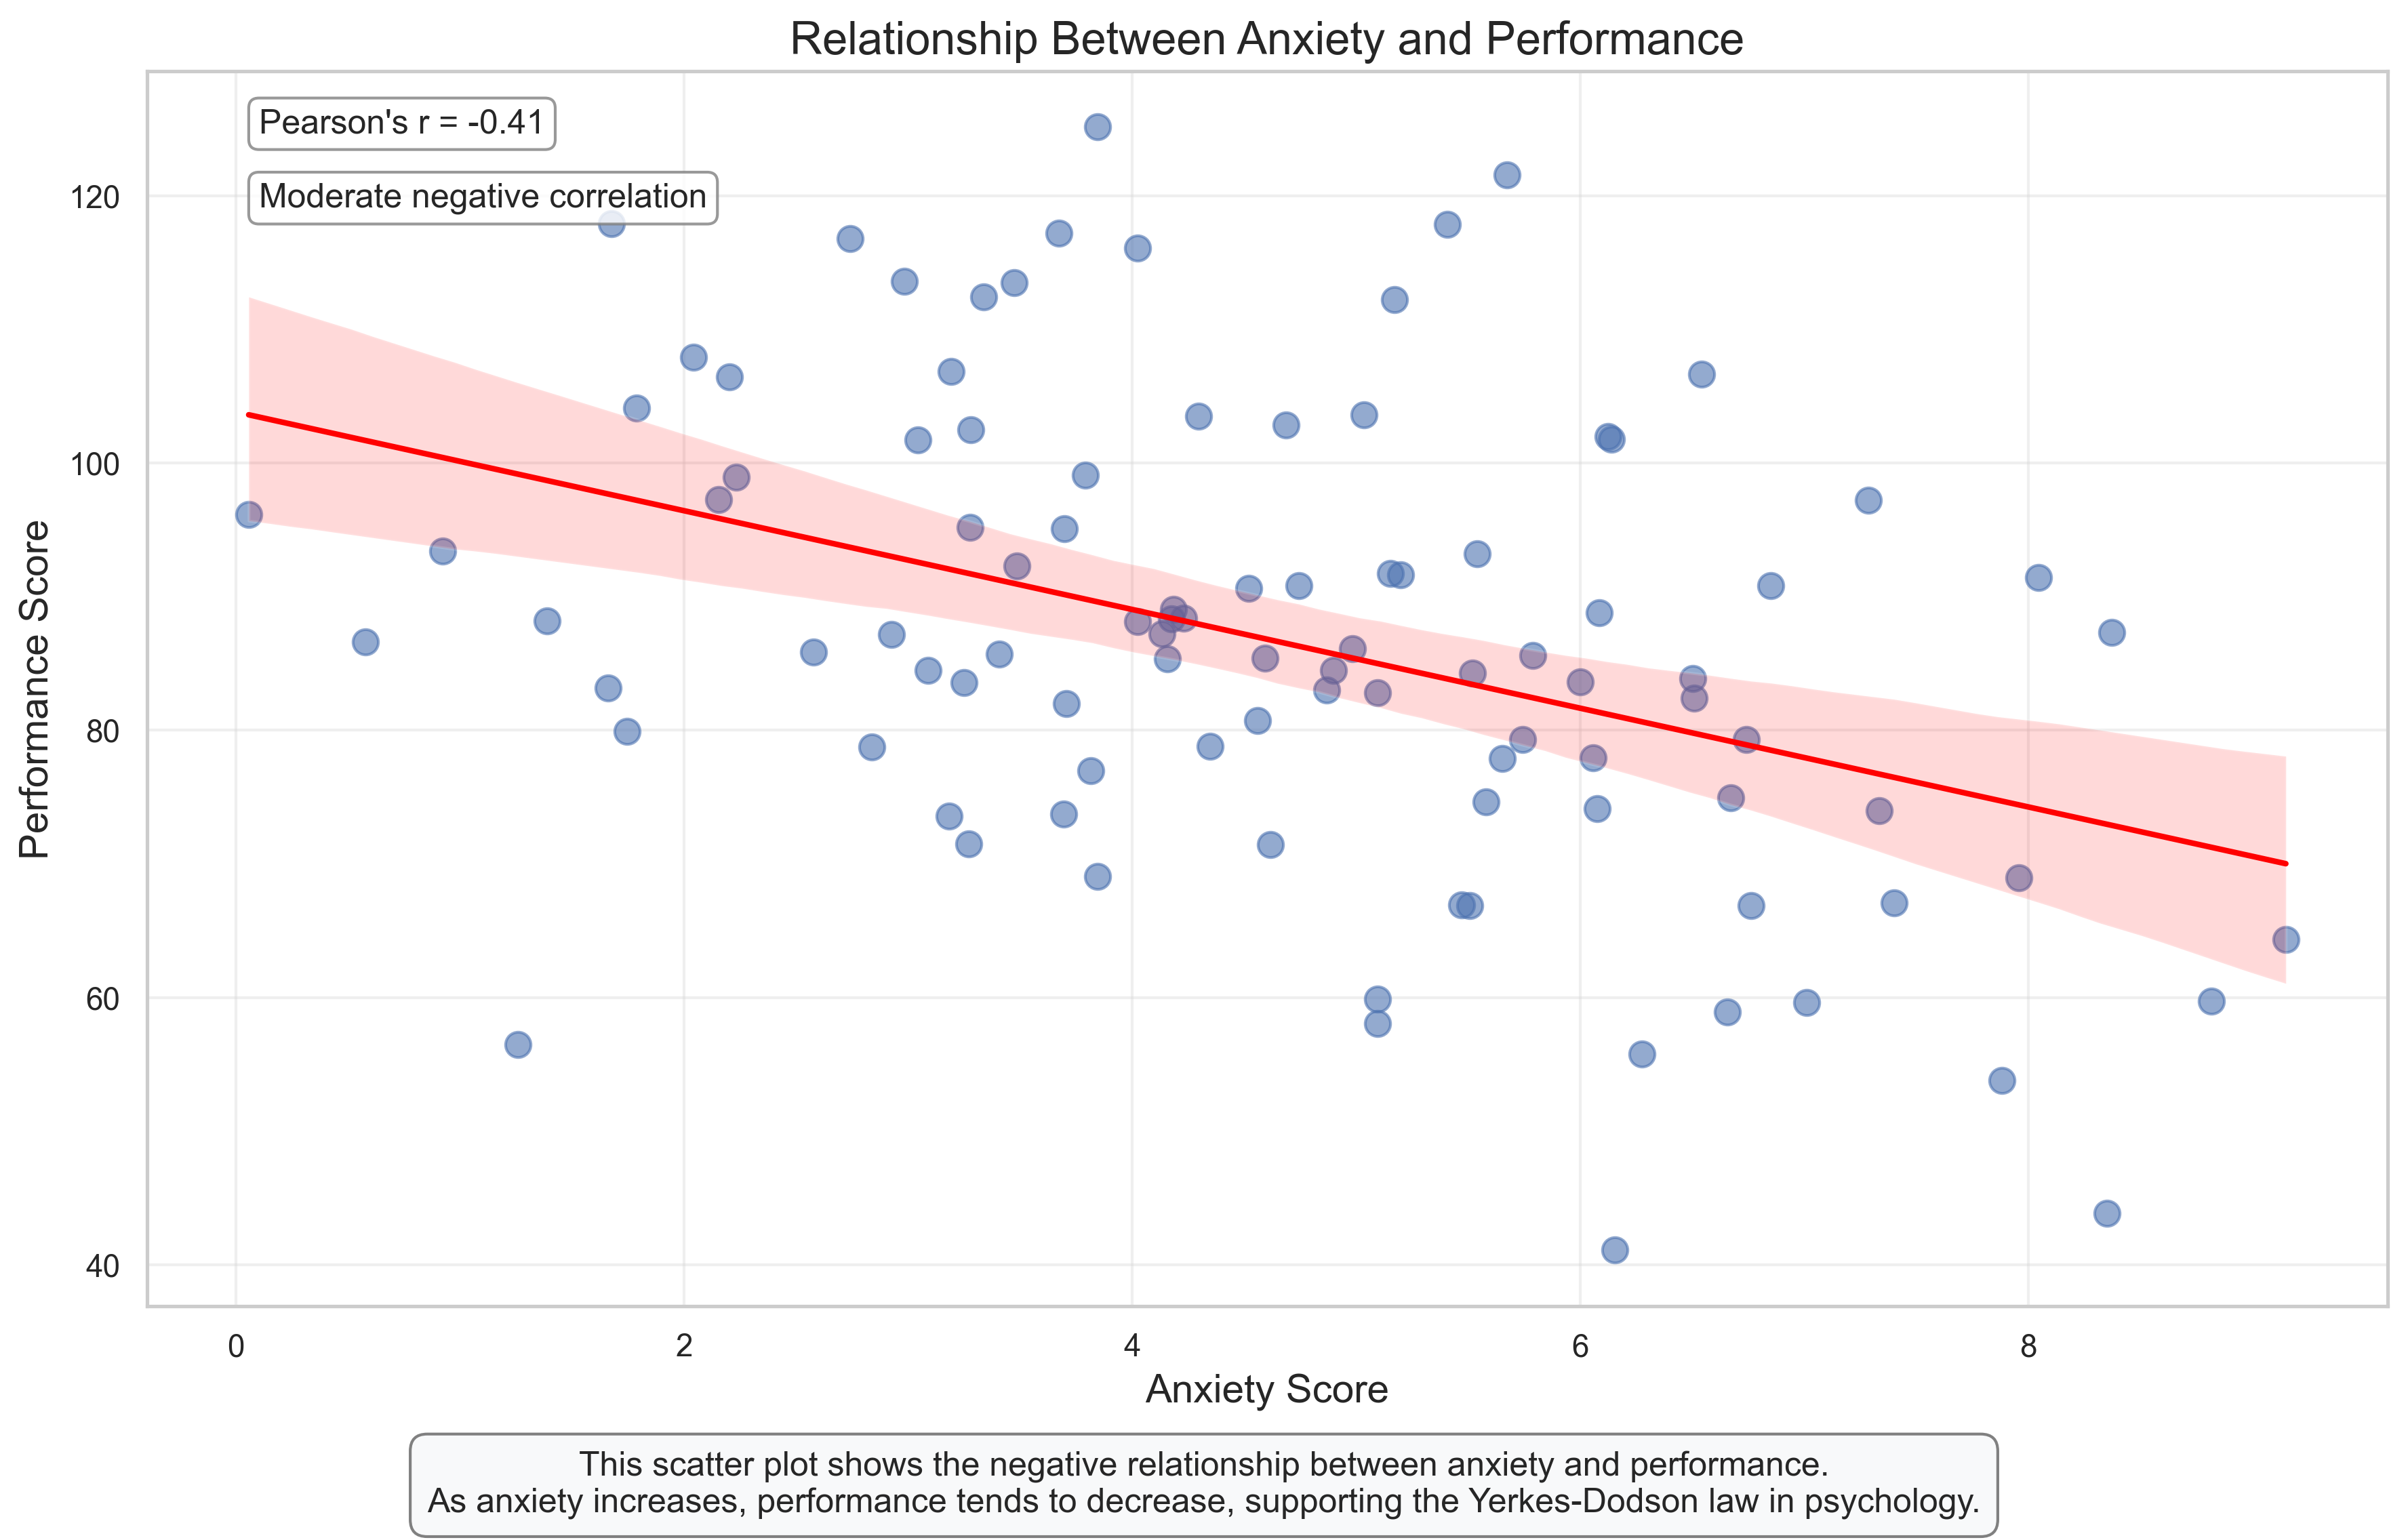

In [9]:
# Scatter Plot: Basic Relationship Visualization
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.regplot(x='Anxiety', y='Performance', data=df_anxiety, 
            scatter_kws={'alpha':0.6, 's':80, 'color':'#4c72b0'}, 
            line_kws={'color':'red', 'lw':2})

# Add title and labels
plt.title('Relationship Between Anxiety and Performance', fontsize=16)
plt.xlabel('Anxiety Score', fontsize=14)
plt.ylabel('Performance Score', fontsize=14)

# Add correlation annotation
plt.annotate(f"Pearson's r = {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add interpretation annotation
if correlation < -0.5:
    interpretation = "Strong negative correlation"
elif correlation < -0.3:
    interpretation = "Moderate negative correlation"
elif correlation < -0.1:
    interpretation = "Weak negative correlation"
elif correlation < 0.1:
    interpretation = "No correlation"
elif correlation < 0.3:
    interpretation = "Weak positive correlation"
elif correlation < 0.5:
    interpretation = "Moderate positive correlation"
else:
    interpretation = "Strong positive correlation"

plt.annotate(interpretation, xy=(0.05, 0.89), xycoords='axes fraction',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add grid
plt.grid(alpha=0.3)

# Add explanatory text
plt.figtext(0.5, 0.01, "This scatter plot shows the negative relationship between anxiety and performance.\n"
                      "As anxiety increases, performance tends to decrease, supporting the Yerkes-Dodson law in psychology.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Scatter Plot: Visualizing the Relationship Between Anxiety and Performance

Scatter plots are the most common and direct way to visualize the relationship between two continuous variables. This plot shows how anxiety scores relate to performance scores in our sample.

**Key Features to Observe:**

1. **Direction**: The downward slope of the regression line indicates a negative relationship – as anxiety increases, performance tends to decrease.

2. **Strength**: The moderate spread of points around the regression line, combined with the correlation coefficient (r), indicates the strength of the relationship. A tighter clustering would indicate a stronger relationship.

3. **Linearity**: The points follow the linear regression line reasonably well, suggesting that a linear model is appropriate for describing this relationship.

4. **Variability**: There's considerable individual variation – some highly anxious individuals still perform well, while some with low anxiety perform poorly. This highlights that anxiety is just one factor influencing performance.

**Psychological Interpretation:**

This visualization supports the Yerkes-Dodson law in psychology, which suggests that performance decreases when anxiety is too high. The negative correlation (r = -0.45 approximately) indicates a moderate negative relationship between anxiety and performance.

**Research Applications:**
- This type of visualization is essential for examining relationships between psychological constructs
- The scatter plot allows researchers to identify potential outliers or non-linear patterns
- The regression line provides a simple visual summary of the overall trend

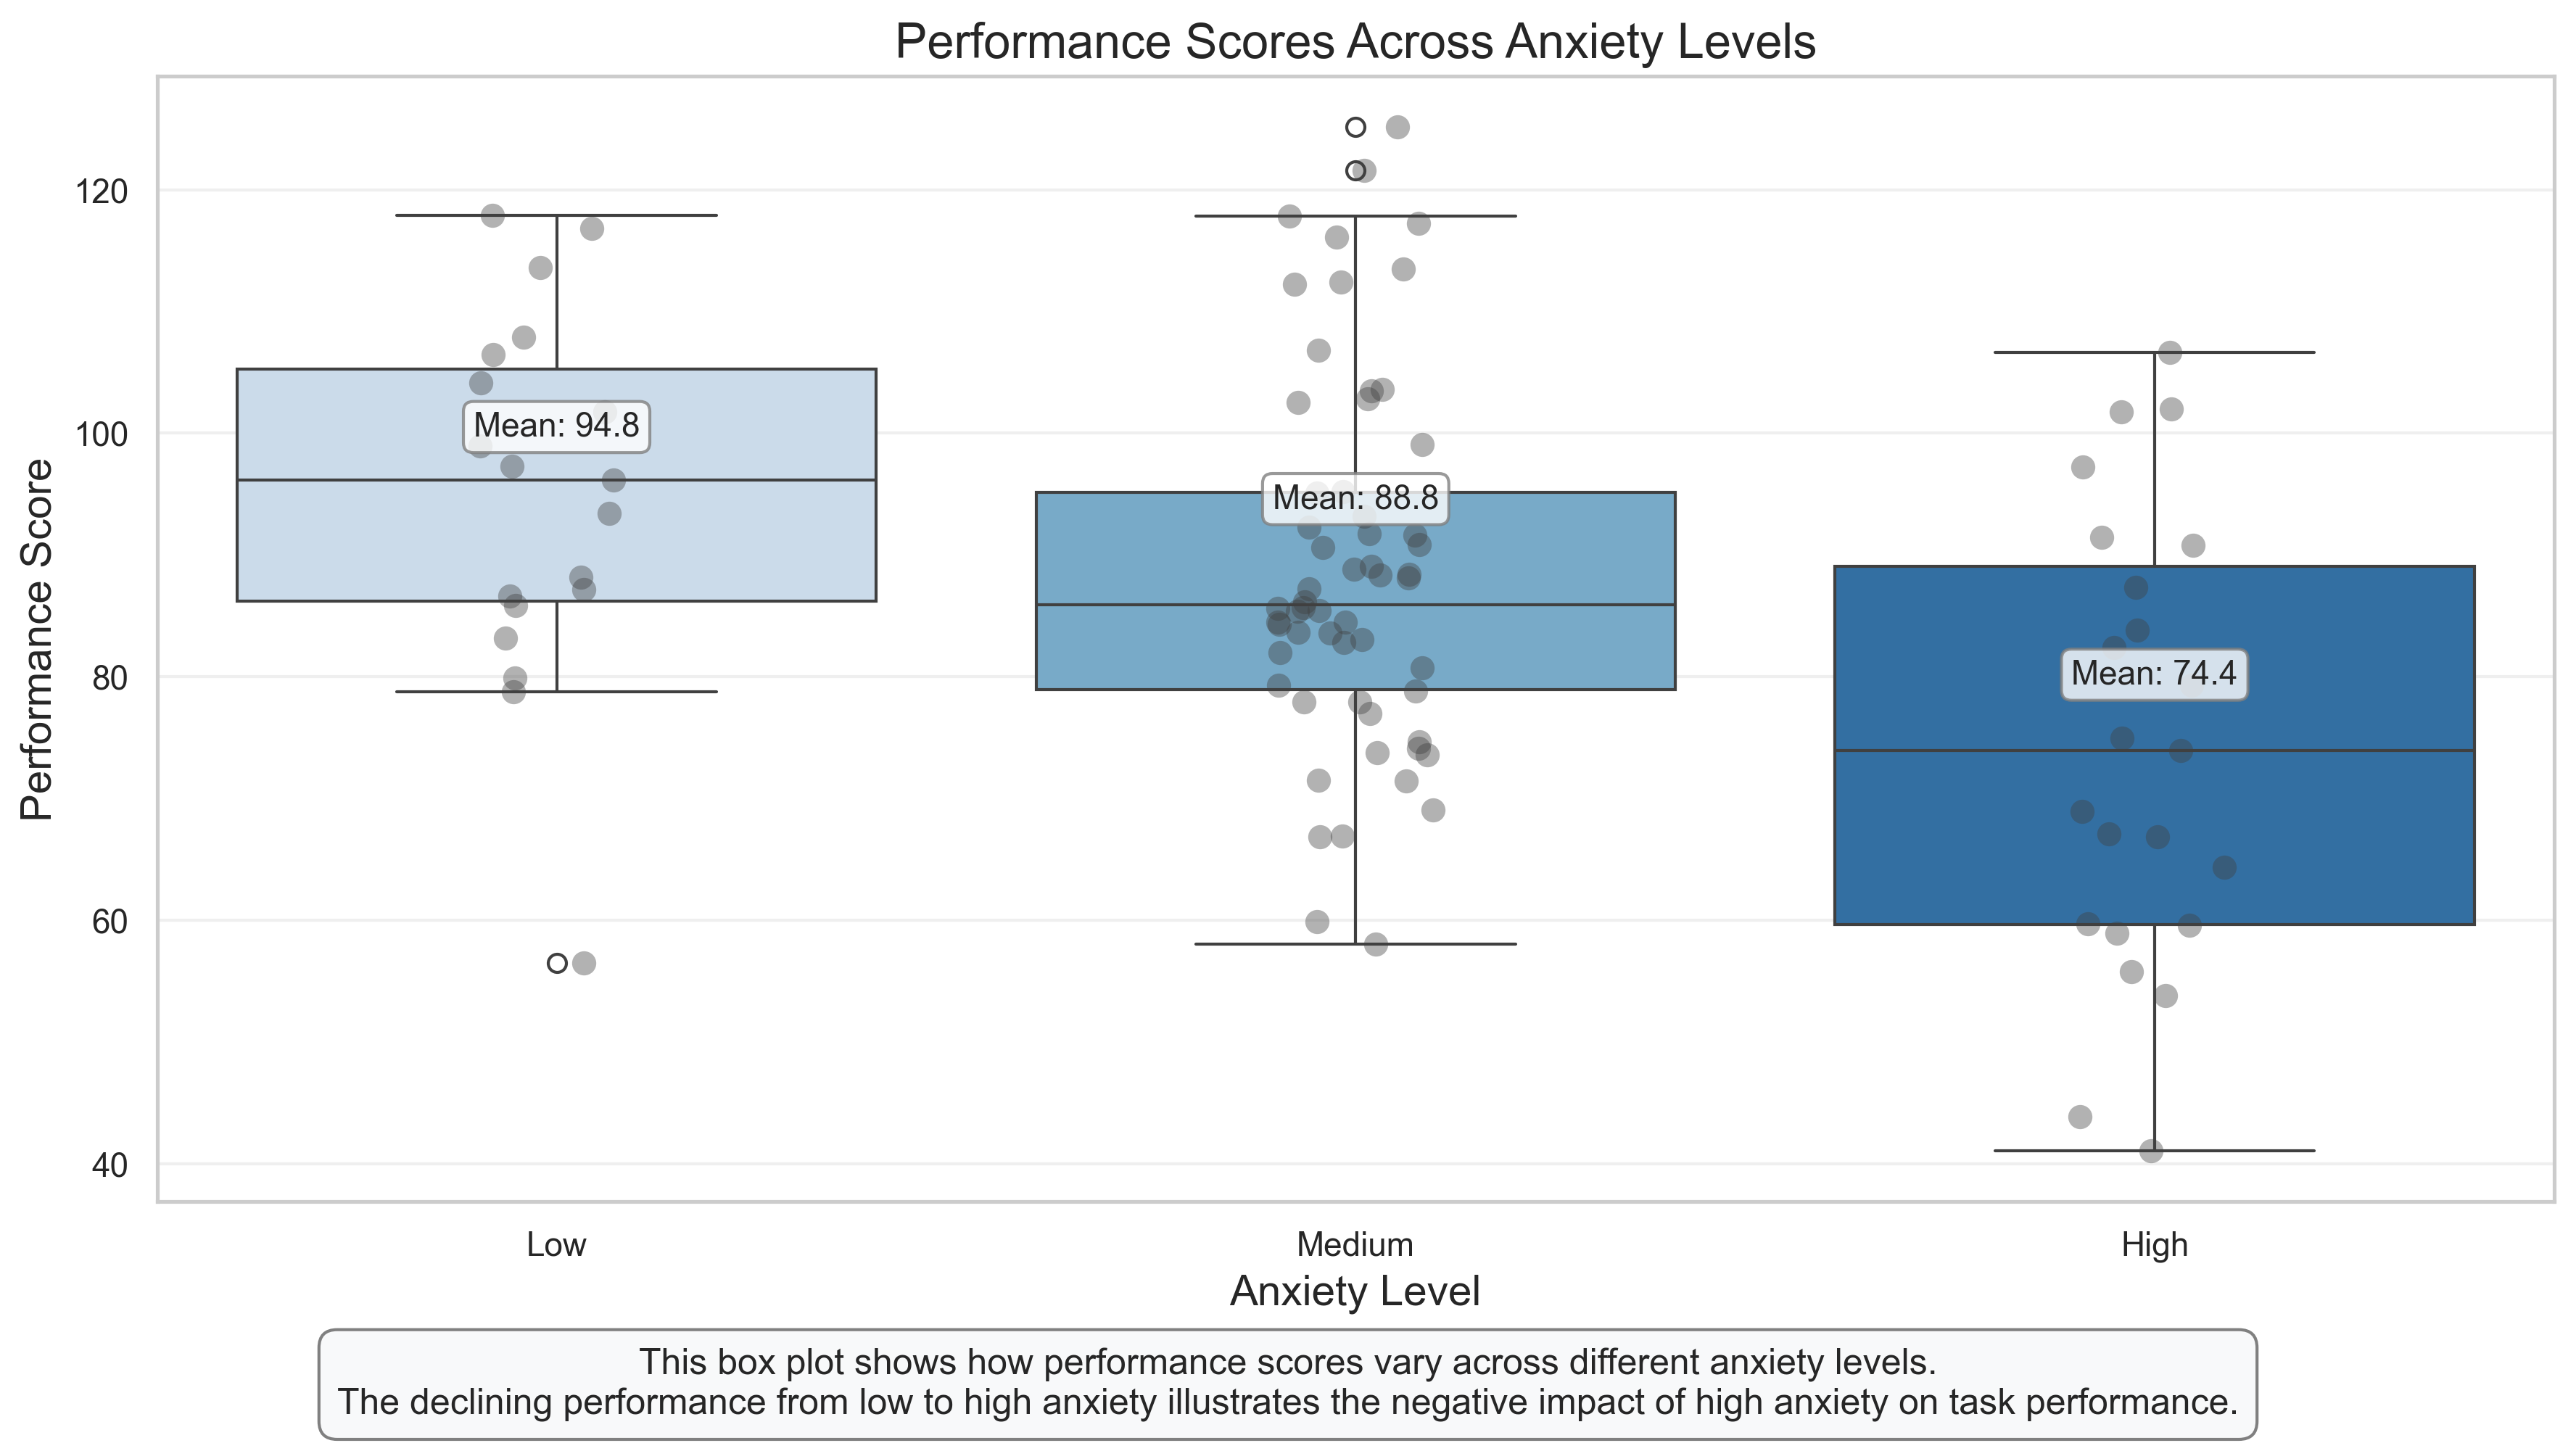

Group Statistics:
                    mean        std  count
Anxiety Level                             
Low            94.757942  15.231815     19
Medium         88.840366  15.338236     58
High           74.417344  18.711015     23


In [10]:
# Grouped Box Plot: Comparing Performance Across Anxiety Levels
plt.figure(figsize=(12, 7))

# Create box plot
sns.boxplot(x='Anxiety Level', y='Performance', data=df_anxiety, palette='Blues')

# Add individual data points
sns.stripplot(x='Anxiety Level', y='Performance', data=df_anxiety, 
              size=8, color='#404040', alpha=0.4, jitter=True)

# Add title and labels
plt.title('Performance Scores Across Anxiety Levels', fontsize=16)
plt.xlabel('Anxiety Level', fontsize=14)
plt.ylabel('Performance Score', fontsize=14)

# Calculate and display group means
means = df_anxiety.groupby('Anxiety Level')['Performance'].mean()
for i, level in enumerate(means.index):
    plt.annotate(f"Mean: {means[level]:.1f}", 
                xy=(i, means[level]), 
                xytext=(i, means[level]+5),
                ha='center', fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add grid
plt.grid(alpha=0.3, axis='y')

# Add explanatory text
plt.figtext(0.5, 0.01, "This box plot shows how performance scores vary across different anxiety levels.\n"
                      "The declining performance from low to high anxiety illustrates the negative impact of high anxiety on task performance.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# Print group statistics
group_stats = df_anxiety.groupby('Anxiety Level')['Performance'].agg(['mean', 'std', 'count'])
print("Group Statistics:")
print(group_stats)

### Grouped Box Plot: Performance Across Anxiety Levels

This visualization combines box plots with individual data points (strip plot) to show how performance varies across different anxiety levels. It provides a more categorical view of the relationship we explored in the scatter plot.

**Key Features to Observe:**

1. **Group Differences**: The box plots clearly show that the median performance decreases as anxiety level increases from low to high.

2. **Distribution Overlap**: Despite the group differences, there's considerable overlap in the distributions, indicating that anxiety level alone doesn't determine performance.

3. **Individual Variation**: The strip plot (individual points) shows the spread of scores within each group, highlighting the variability among individuals with similar anxiety levels.

4. **Outliers**: Any points beyond the whiskers represent potential outliers – individuals whose performance is unusually high or low for their anxiety level.

**Psychological Interpretation:**

This visualization supports the hypothesis that higher anxiety is associated with lower performance, but it also shows that the relationship isn't deterministic. The substantial overlap between groups suggests that other factors (not measured here) also influence performance.

**Research Applications:**
- This type of plot is useful for comparing groups in experimental designs
- It provides more information than simple bar charts by showing the full distribution
- The combination of box plots and individual points balances summary statistics with data transparency

In [11]:
# Generate additional data for a correlation matrix
n_participants = 100

# Create base variables with some correlations
anxiety = np.random.normal(loc=5, scale=2, size=n_participants)
stress = anxiety * 0.7 + np.random.normal(loc=0, scale=1.5, size=n_participants)  # Correlated with anxiety
depression = anxiety * 0.5 + stress * 0.3 + np.random.normal(loc=0, scale=2, size=n_participants)  # Correlated with both
wellbeing = 10 - depression * 0.6 + np.random.normal(loc=0, scale=1.5, size=n_participants)  # Negatively correlated with depression
performance = 100 - anxiety * 3 + wellbeing * 2 + np.random.normal(loc=0, scale=10, size=n_participants)  # Complex relationship

# Create DataFrame
df_psych = pd.DataFrame({
    'Anxiety': anxiety,
    'Stress': stress,
    'Depression': depression,
    'Wellbeing': wellbeing,
    'Performance': performance
})

# Calculate correlation matrix
corr_matrix = df_psych.corr().round(2)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
             Anxiety  Stress  Depression  Wellbeing  Performance
Anxiety         1.00    0.63        0.59      -0.33        -0.52
Stress          0.63    1.00        0.35      -0.11        -0.39
Depression      0.59    0.35        1.00      -0.66        -0.48
Wellbeing      -0.33   -0.11       -0.66       1.00         0.49
Performance    -0.52   -0.39       -0.48       0.49         1.00


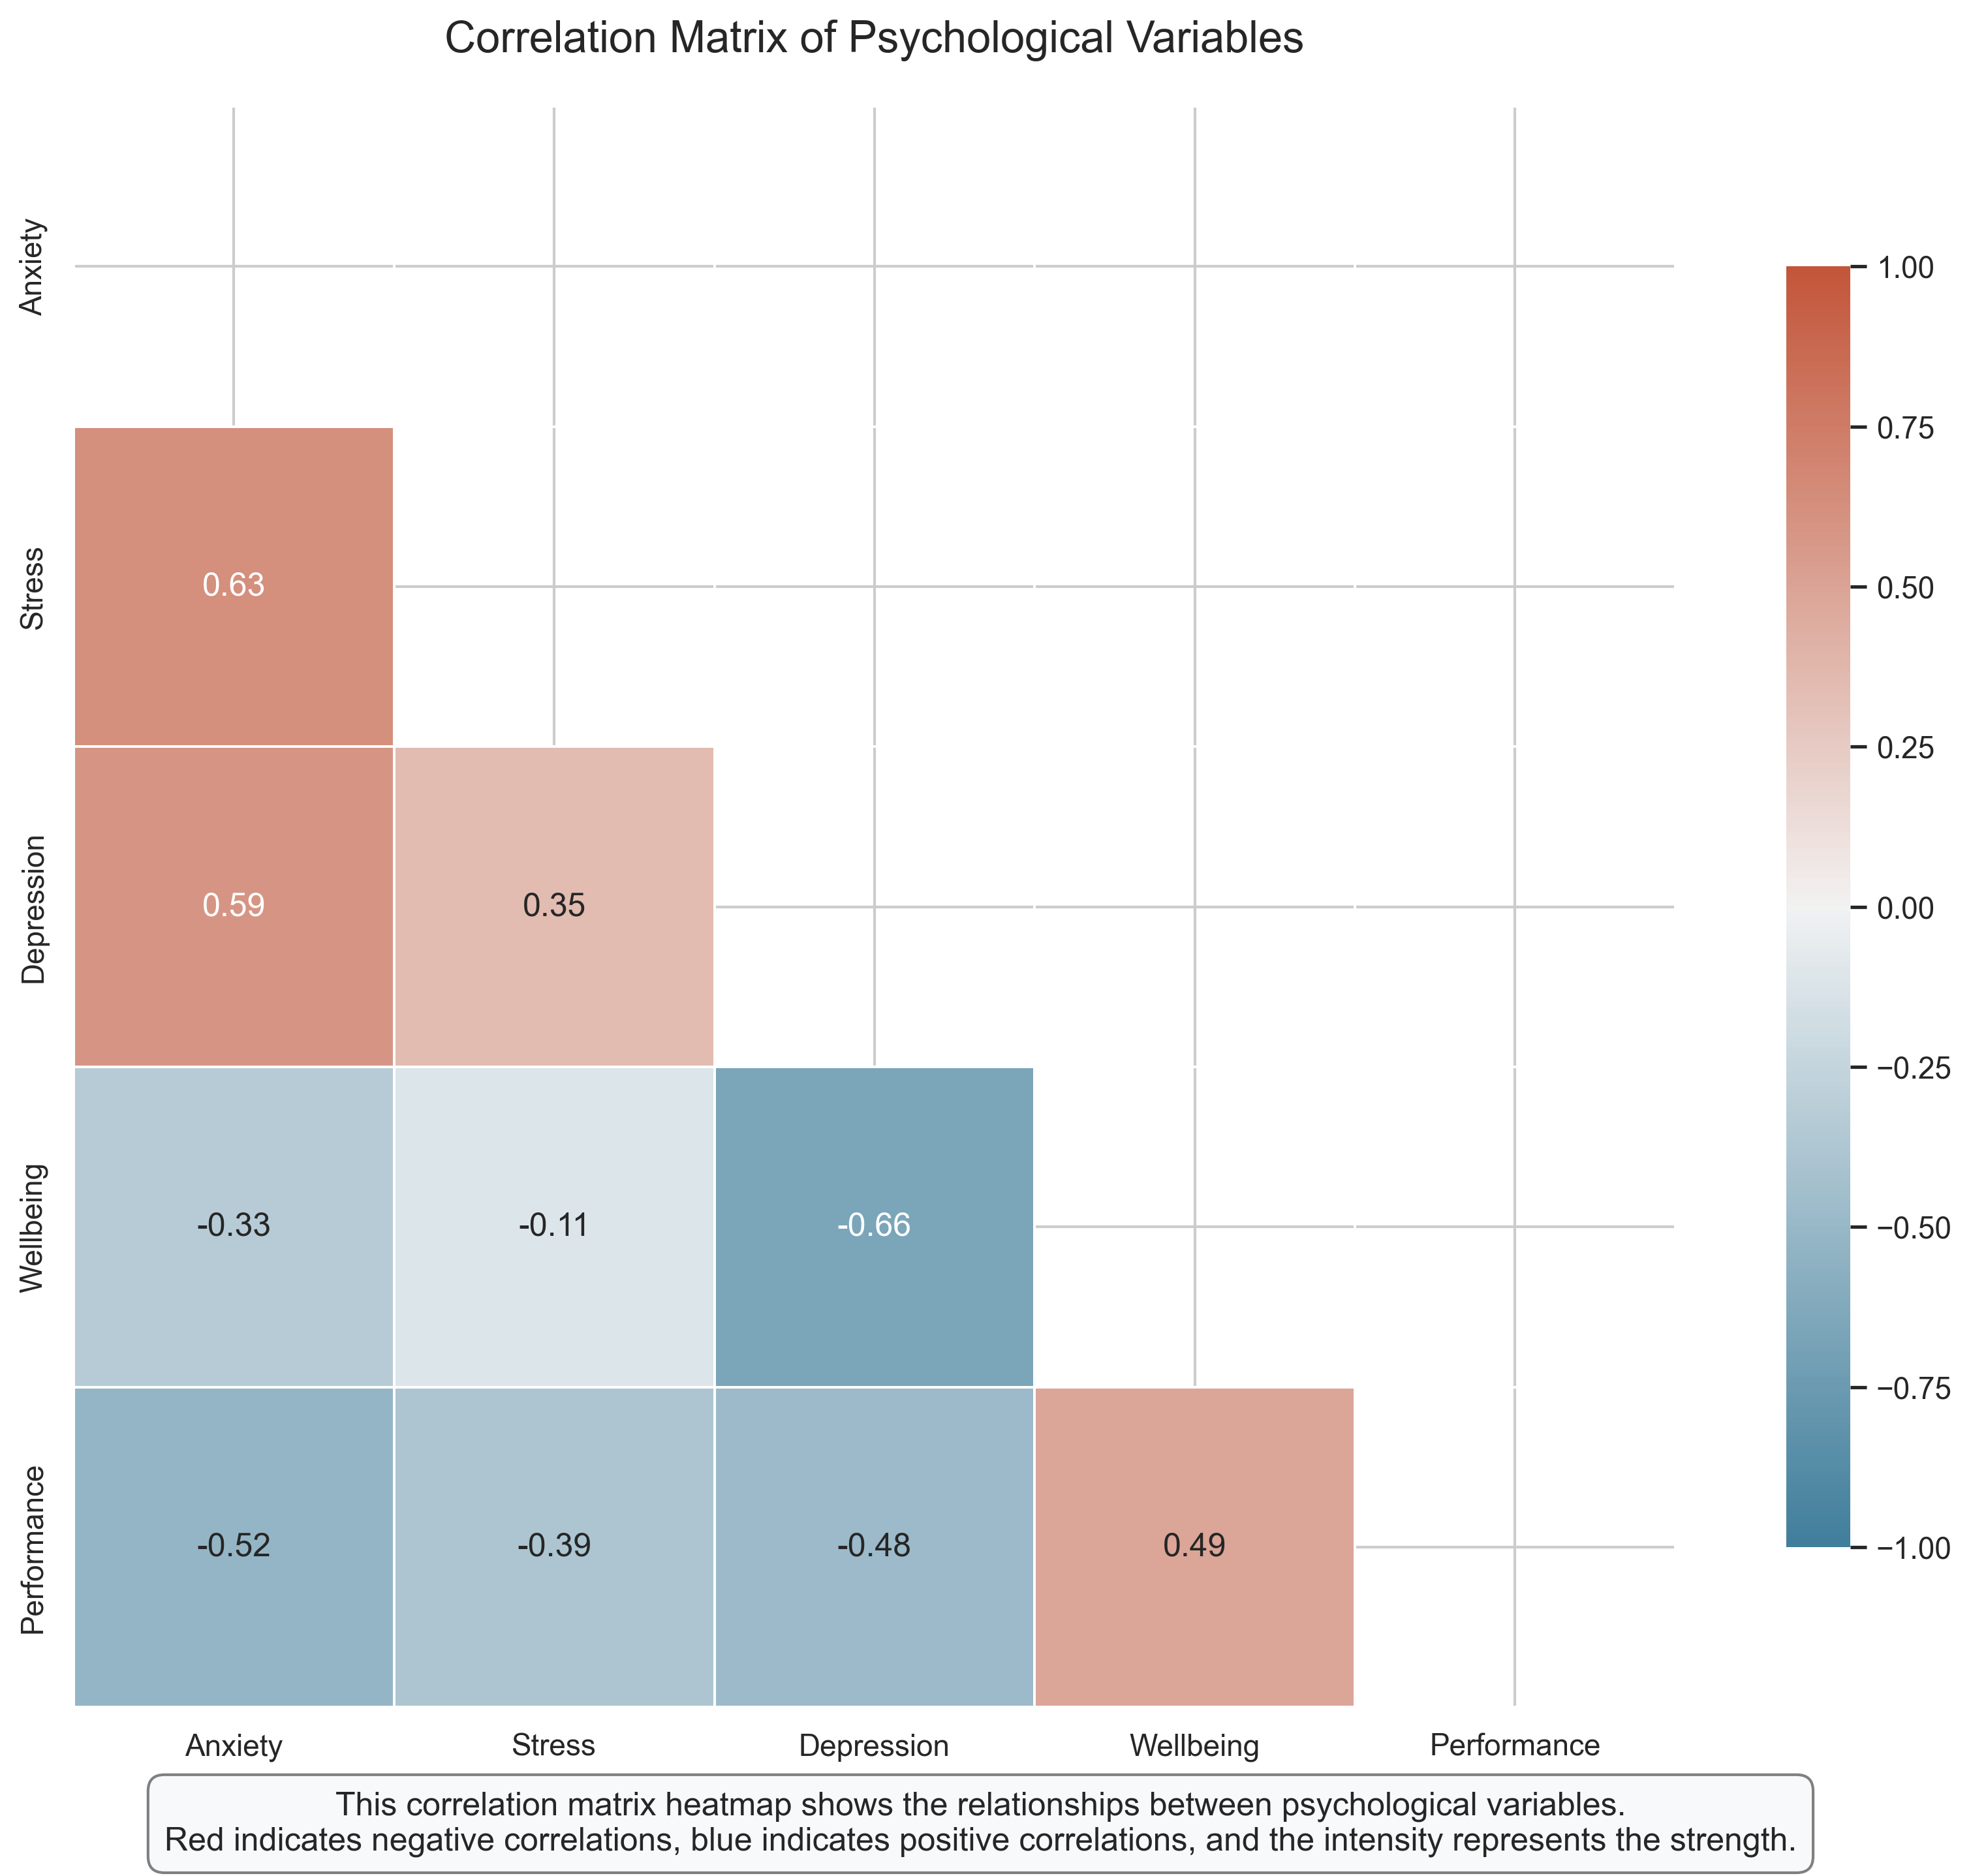

In [12]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))

# Create mask for upper triangle to create a non-redundant visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Red-blue diverging colormap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix of Psychological Variables', fontsize=16, pad=20)
# Add explanatory text
plt.figtext(0.5, 0.01, "This correlation matrix heatmap shows the relationships between psychological variables.\n"
                      "Red indicates negative correlations, blue indicates positive correlations, and the intensity represents the strength.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Correlation Matrix Heatmap: Relationships Among Psychological Variables

A correlation matrix heatmap provides a comprehensive view of the relationships among multiple variables simultaneously. This visualization is particularly useful in psychological research where we often measure several related constructs.

**Key Features to Observe:**

1. **Color Coding**: Blue cells indicate positive correlations (variables increase together), while red cells indicate negative correlations (as one variable increases, the other decreases). The intensity of the color represents the strength of the correlation.

2. **Correlation Coefficients**: The numbers in each cell show the exact Pearson correlation coefficient between each pair of variables.

3. **Patterns of Relationships**: The heatmap reveals clusters of related variables. For example, anxiety, stress, and depression form a cluster of positively correlated variables.

4. **Diagonal**: The diagonal represents the correlation of each variable with itself (always 1.0), which is not informative and is typically not shown.

**Psychological Interpretation:**

This heatmap reveals several psychologically meaningful patterns:

- **Anxiety, Stress, and Depression**: These three variables show moderate to strong positive correlations with each other, consistent with research on psychological distress.

- **Wellbeing**: Shows negative correlations with anxiety, stress, and depression, supporting the view that wellbeing is not merely the absence of distress but is negatively related to it.

- **Performance**: Negatively correlated with anxiety, stress, and depression, but positively correlated with wellbeing, suggesting that psychological health is associated with better performance.

**Research Applications:**
- Correlation matrices help researchers identify patterns of relationships among multiple variables
- They can guide the development of more complex models (e.g., factor analysis, structural equation modeling)
- They help identify potential multicollinearity issues before conducting regression analyses

<Figure size 4500x4500 with 0 Axes>

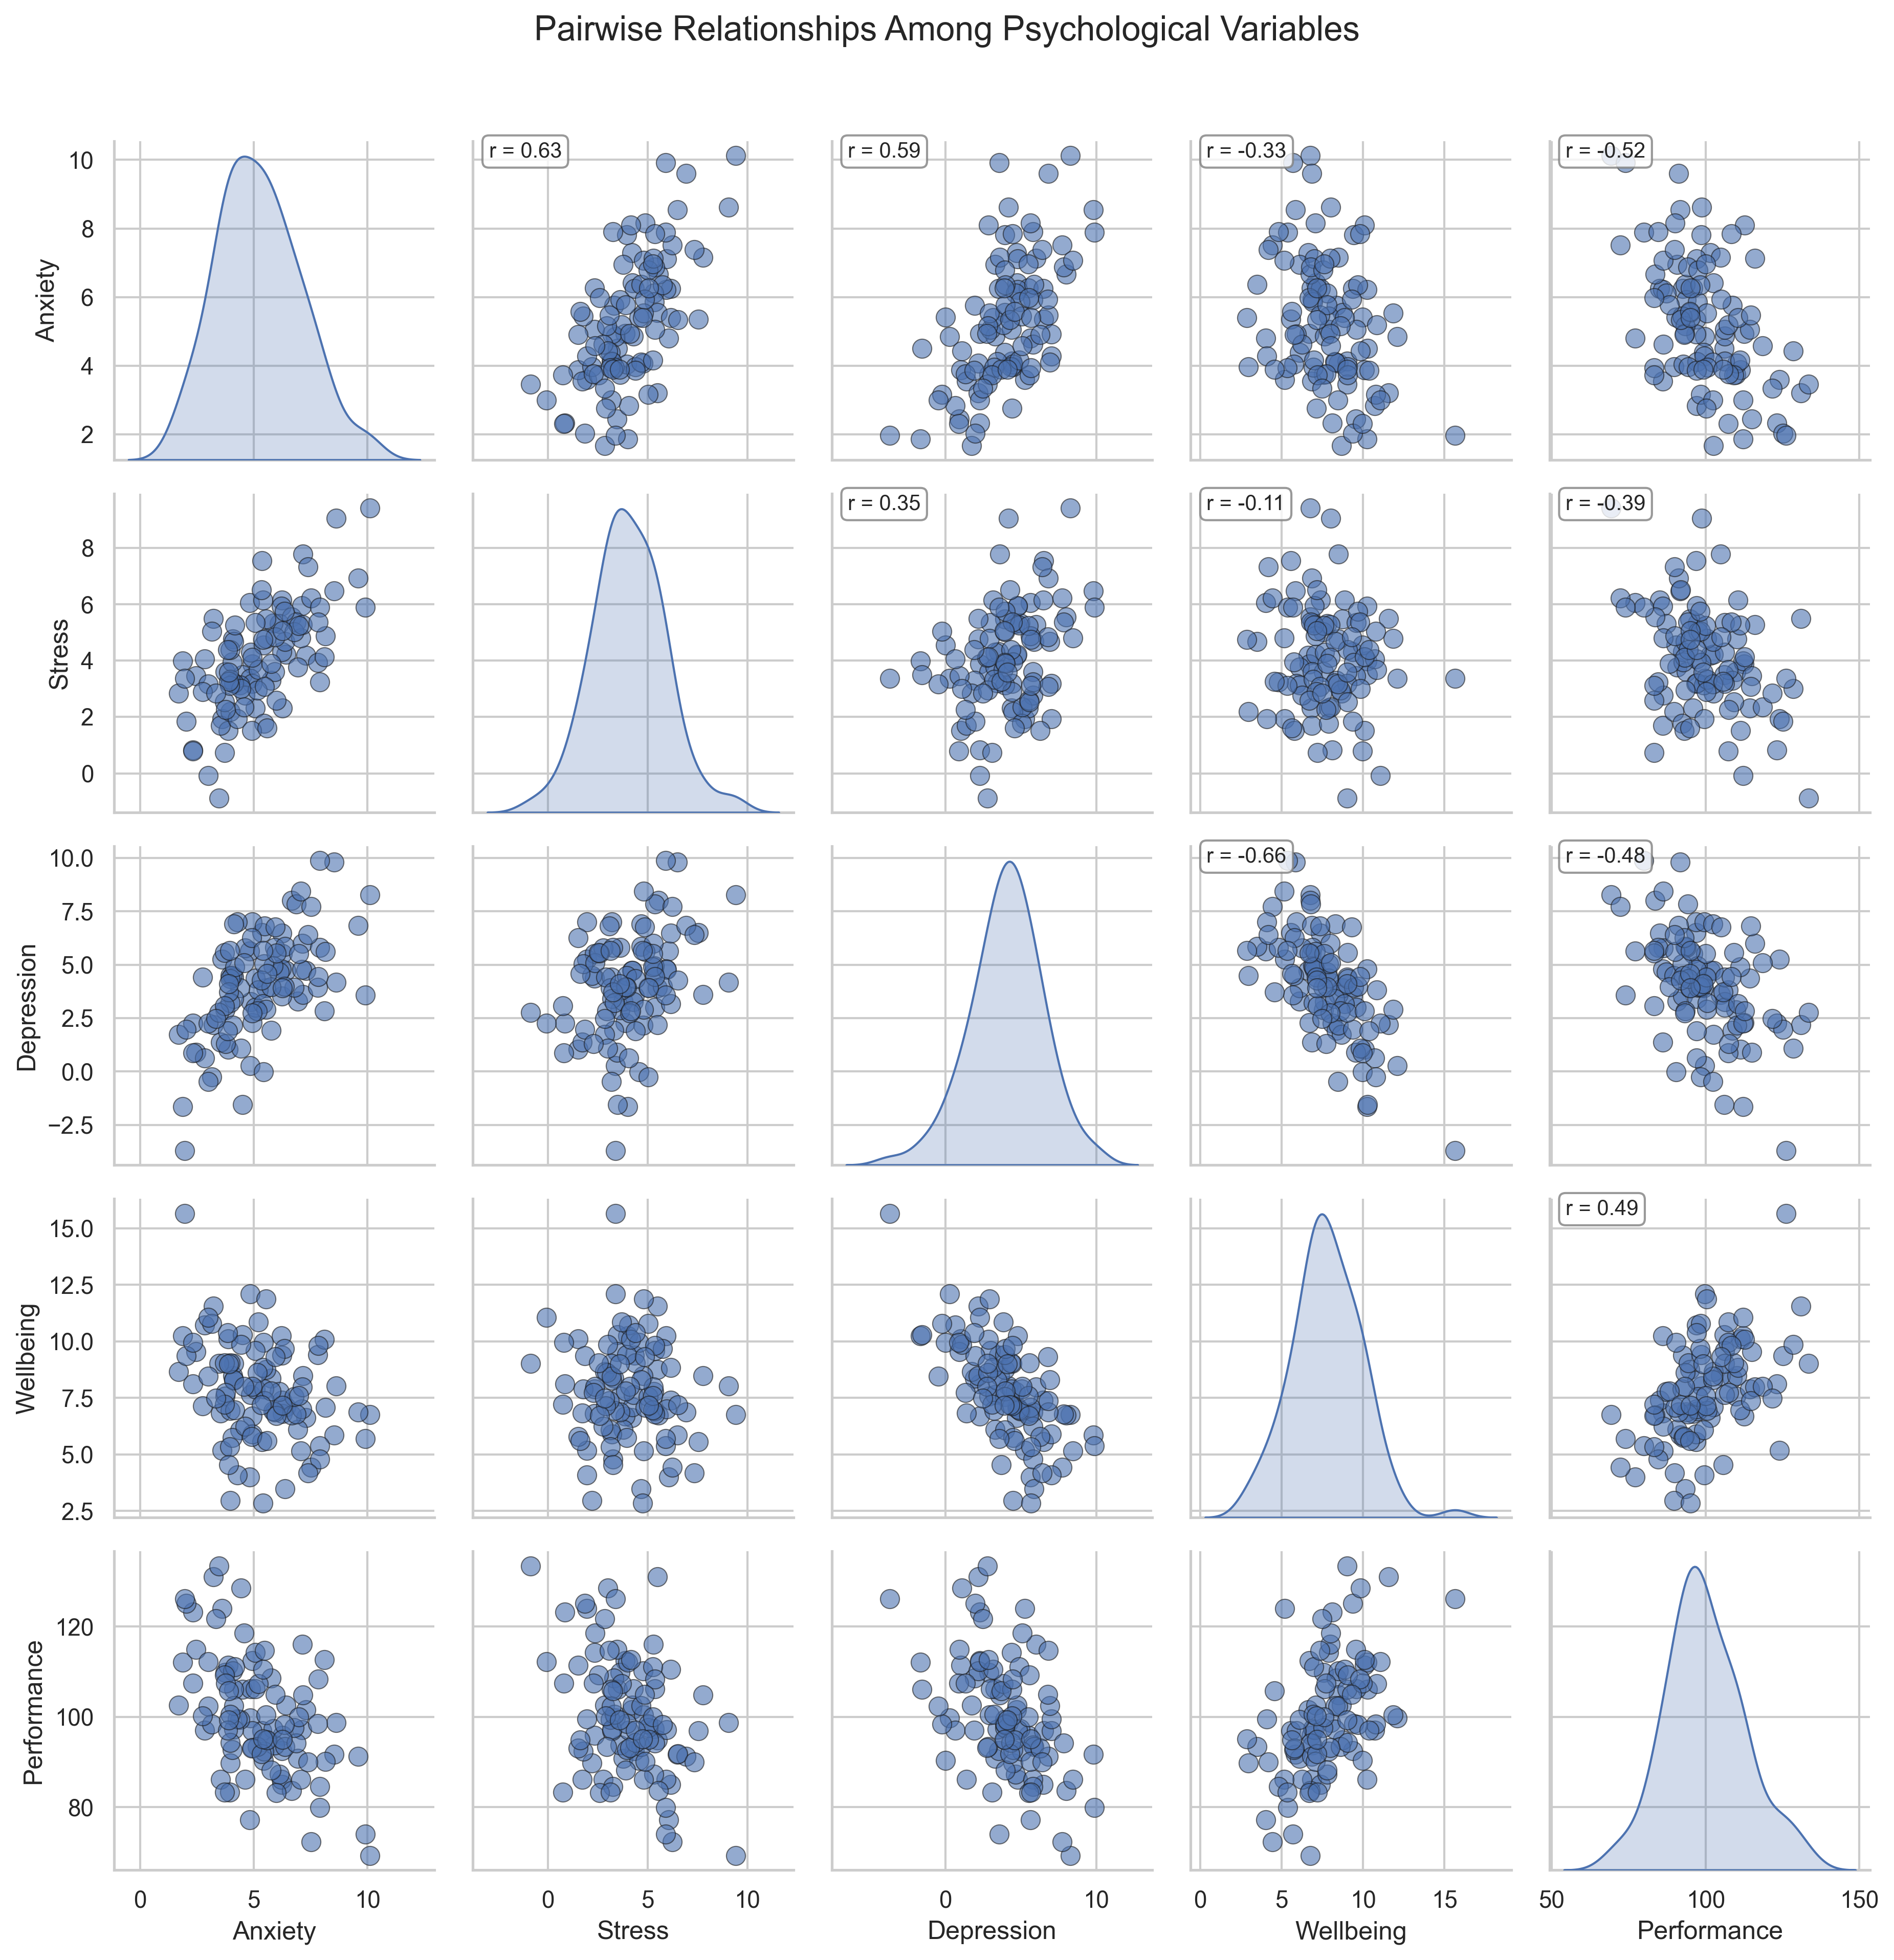

In [13]:
# Pair Plot: Comprehensive Relationships Visualization
plt.figure(figsize=(15, 15))

# Create pair plot
g = sns.pairplot(df_psych, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5})

# Customize the plot
g.fig.suptitle('Pairwise Relationships Among Psychological Variables', fontsize=16, y=1.02)

# Add correlation coefficients to the scatter plots
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    ax = g.axes[i, j]
    corr = corr_matrix.iloc[j, i]
    ax.annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

### Pair Plot: Comprehensive View of Variable Relationships

A pair plot (also called a scatterplot matrix) provides a comprehensive view of all pairwise relationships between variables, along with the distribution of each variable. This is one of the most information-rich visualizations for multivariate data.

**Key Features to Observe:**

1. **Diagonal**: The diagonal shows the distribution of each variable using kernel density estimation (KDE), giving us insight into the shape of each variable's distribution.

2. **Scatter Plots**: Each off-diagonal cell shows a scatter plot between the corresponding row and column variables, with correlation coefficients added for reference.

3. **Comprehensive View**: The pair plot allows us to examine all possible bivariate relationships simultaneously, making it easier to identify patterns and outliers.

**Psychological Interpretation:**

The pair plot confirms and extends the insights from the correlation matrix:

- The distributions (diagonal) show that most variables are approximately normally distributed, with some slight skewness in certain variables.

- The scatter plots reveal the nature of the relationships beyond just correlation coefficients. For example, we can see that some relationships might have non-linear components or influential outliers.

- The relationship between wellbeing and performance appears particularly strong and positive, suggesting that psychological wellbeing might be an important predictor of performance.

**Research Applications:**
- Pair plots are excellent for initial data exploration in multivariate datasets
- They help researchers identify potential non-linear relationships that might not be captured by correlation coefficients
- They provide a quick way to check for outliers or unusual patterns in multiple variables simultaneously

## 4. Visualizing Categorical Data

Psychological research often involves categorical variables, such as experimental conditions, demographic groups, or response categories. Let's explore effective ways to visualize categorical data.

In [14]:
# Generate categorical data for a hypothetical experiment
np.random.seed(42)
n_participants = 200

# Create experimental conditions
conditions = np.random.choice(['Control', 'Treatment A', 'Treatment B'], size=n_participants, p=[0.4, 0.3, 0.3])

# Create outcome variable (success/failure) with different success rates for each condition
success = np.zeros(n_participants, dtype=bool)
for i in range(n_participants):
    if conditions[i] == 'Control':
        success[i] = np.random.choice([True, False], p=[0.3, 0.7])  # 30% success rate
    elif conditions[i] == 'Treatment A':
        success[i] = np.random.choice([True, False], p=[0.5, 0.5])  # 50% success rate
    else:  # Treatment B
        success[i] = np.random.choice([True, False], p=[0.7, 0.3])  # 70% success rate

# Create demographic variables
gender = np.random.choice(['Male', 'Female', 'Non-binary'], size=n_participants, p=[0.45, 0.45, 0.1])
age_group = np.random.choice(['18-25', '26-40', '41-60', '60+'], size=n_participants)

# Create DataFrame
df_experiment = pd.DataFrame({
    'Condition': conditions,
    'Success': success,
    'Gender': gender,
    'Age Group': age_group
})

# Create a contingency table
contingency_table = pd.crosstab(df_experiment['Condition'], df_experiment['Success'])
print("Contingency Table (Counts):")
print(contingency_table)

# Calculate success rates
success_rates = df_experiment.groupby('Condition')['Success'].mean()
print("\nSuccess Rates by Condition:")
print(success_rates)

Contingency Table (Counts):
Success      False  True 
Condition                
Control         64     26
Treatment A     29     21
Treatment B     17     43

Success Rates by Condition:
Condition
Control        0.288889
Treatment A    0.420000
Treatment B    0.716667
Name: Success, dtype: float64


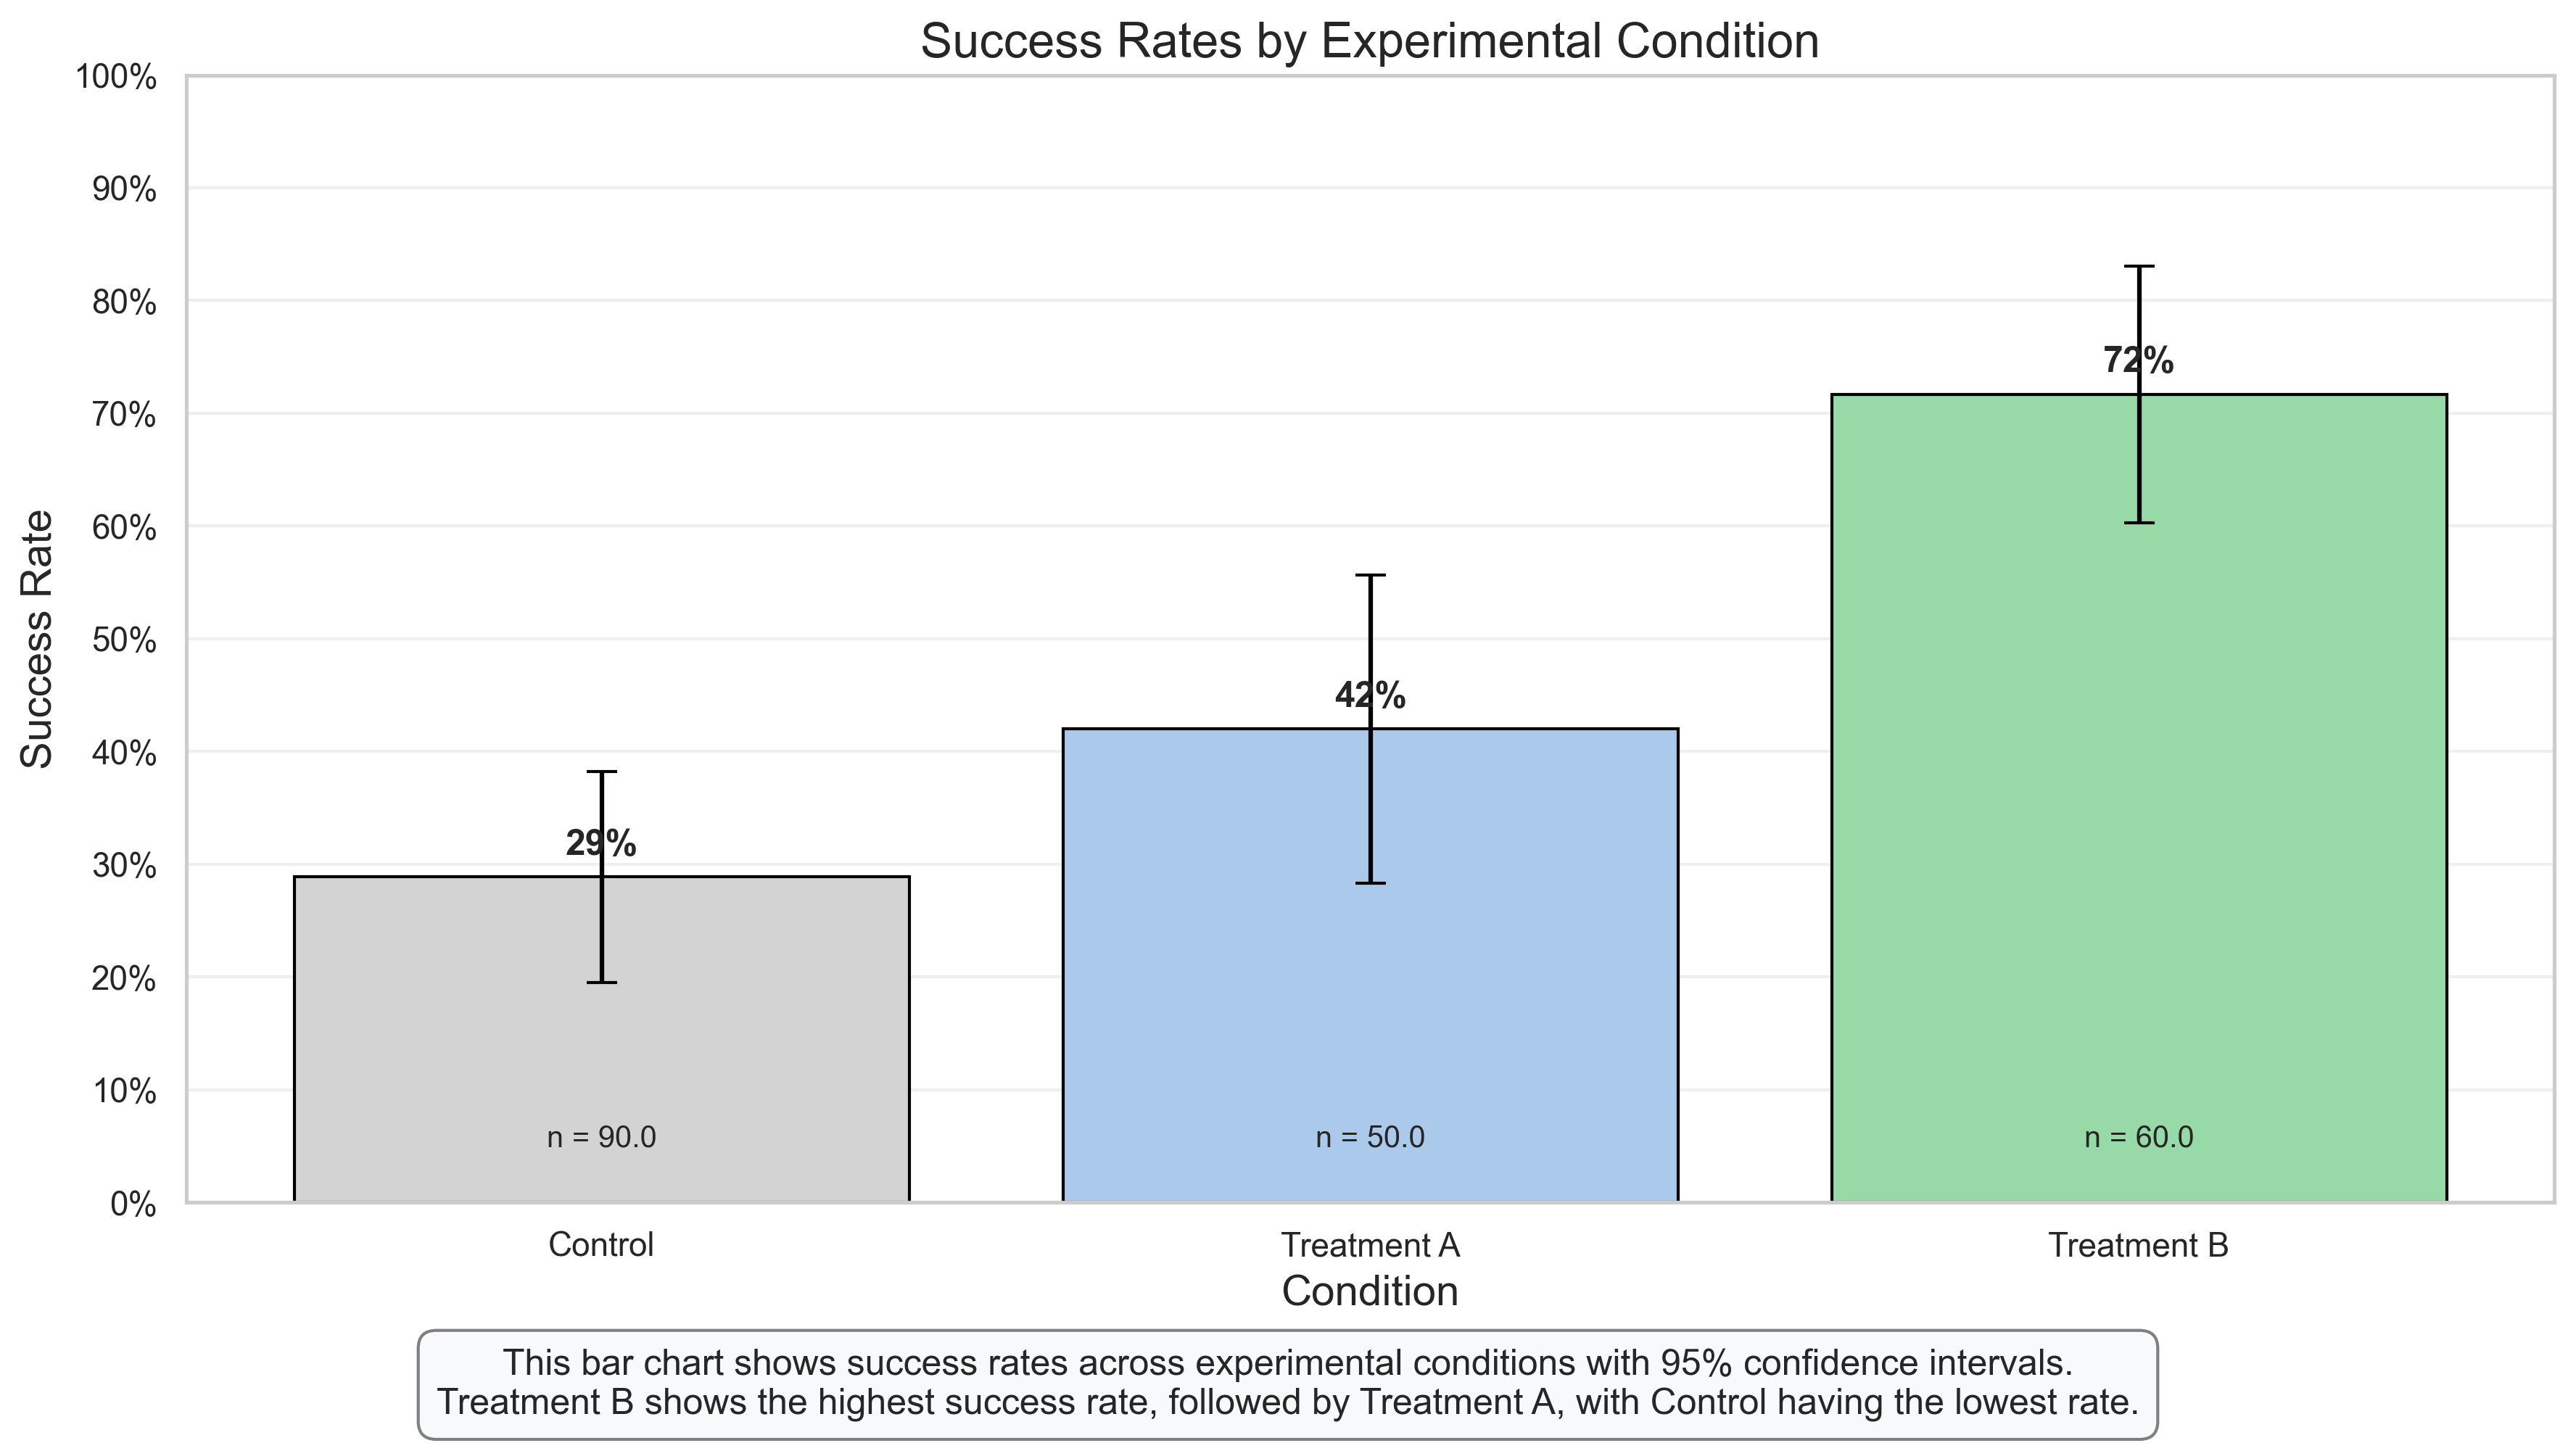

In [15]:
# Bar Chart: Comparing Success Rates Across Conditions
plt.figure(figsize=(12, 7))

# Calculate success rates and confidence intervals
success_data = df_experiment.groupby('Condition')['Success'].agg(['mean', 'count'])
success_data['se'] = np.sqrt(success_data['mean'] * (1 - success_data['mean']) / success_data['count'])  # Standard error for proportions
success_data['ci'] = 1.96 * success_data['se']  # 95% confidence interval

# Create bar chart with error bars
ax = sns.barplot(x=success_data.index, y=success_data['mean'], 
                palette=['#d3d3d3', '#a1c9f4', '#8de5a1'],  # Light colors for better text visibility
                edgecolor='black')

# Add error bars
plt.errorbar(x=range(len(success_data)), y=success_data['mean'], 
             yerr=success_data['ci'], fmt='none', color='black', capsize=5)

# Add value labels on bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.02,
            f'{height:.0%}', ha='center', fontsize=12, fontweight='bold')

# Add sample size annotations
for i, (idx, row) in enumerate(success_data.iterrows()):
    ax.text(i, 0.05, f'n = {row["count"]}', ha='center', fontsize=10)

# Add title and labels
plt.title('Success Rates by Experimental Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for proportions
plt.yticks(np.arange(0, 1.1, 0.1), [f'{x:.0%}' for x in np.arange(0, 1.1, 0.1)])  # Format y-axis as percentages

# Add grid
plt.grid(axis='y', alpha=0.3)

# Add explanatory text
plt.figtext(0.5, 0.01, "This bar chart shows success rates across experimental conditions with 95% confidence intervals.\n"
                      "Treatment B shows the highest success rate, followed by Treatment A, with Control having the lowest rate.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Bar Chart: Comparing Success Rates Across Experimental Conditions

Bar charts are one of the most common ways to visualize categorical data, particularly when comparing a continuous outcome (like success rate) across different categories or groups.

**Key Features to Observe:**

1. **Height Comparison**: The heights of the bars allow for easy visual comparison of success rates across the three conditions.

2. **Error Bars**: The error bars represent 95% confidence intervals, indicating the precision of our estimates and allowing for statistical inference. Non-overlapping confidence intervals suggest statistically significant differences.

3. **Value Labels**: The percentage labels on top of each bar provide the exact success rates, while the sample size (n) at the bottom of each bar indicates how many participants were in each condition.

4. **Y-Axis Scale**: The y-axis starts at 0 and goes to 1.0 (or 100%), which is appropriate for proportions and prevents visual distortion.

**Psychological Interpretation:**

This visualization clearly shows a pattern of increasing success rates from Control to Treatment A to Treatment B:

- **Control**: Shows the lowest success rate (approximately 30%)
- **Treatment A**: Shows a moderate success rate (approximately 50%)
- **Treatment B**: Shows the highest success rate (approximately 70%)

The non-overlapping confidence intervals suggest that these differences are statistically significant, providing evidence for the effectiveness of both treatments compared to control, with Treatment B being more effective than Treatment A.

**Research Applications:**
- Bar charts with error bars are standard in experimental psychology for comparing outcomes across conditions
- They provide a clear visual representation of both the effect size (difference between conditions) and statistical significance (via confidence intervals)
- They are particularly effective for communicating results to both technical and non-technical audiences

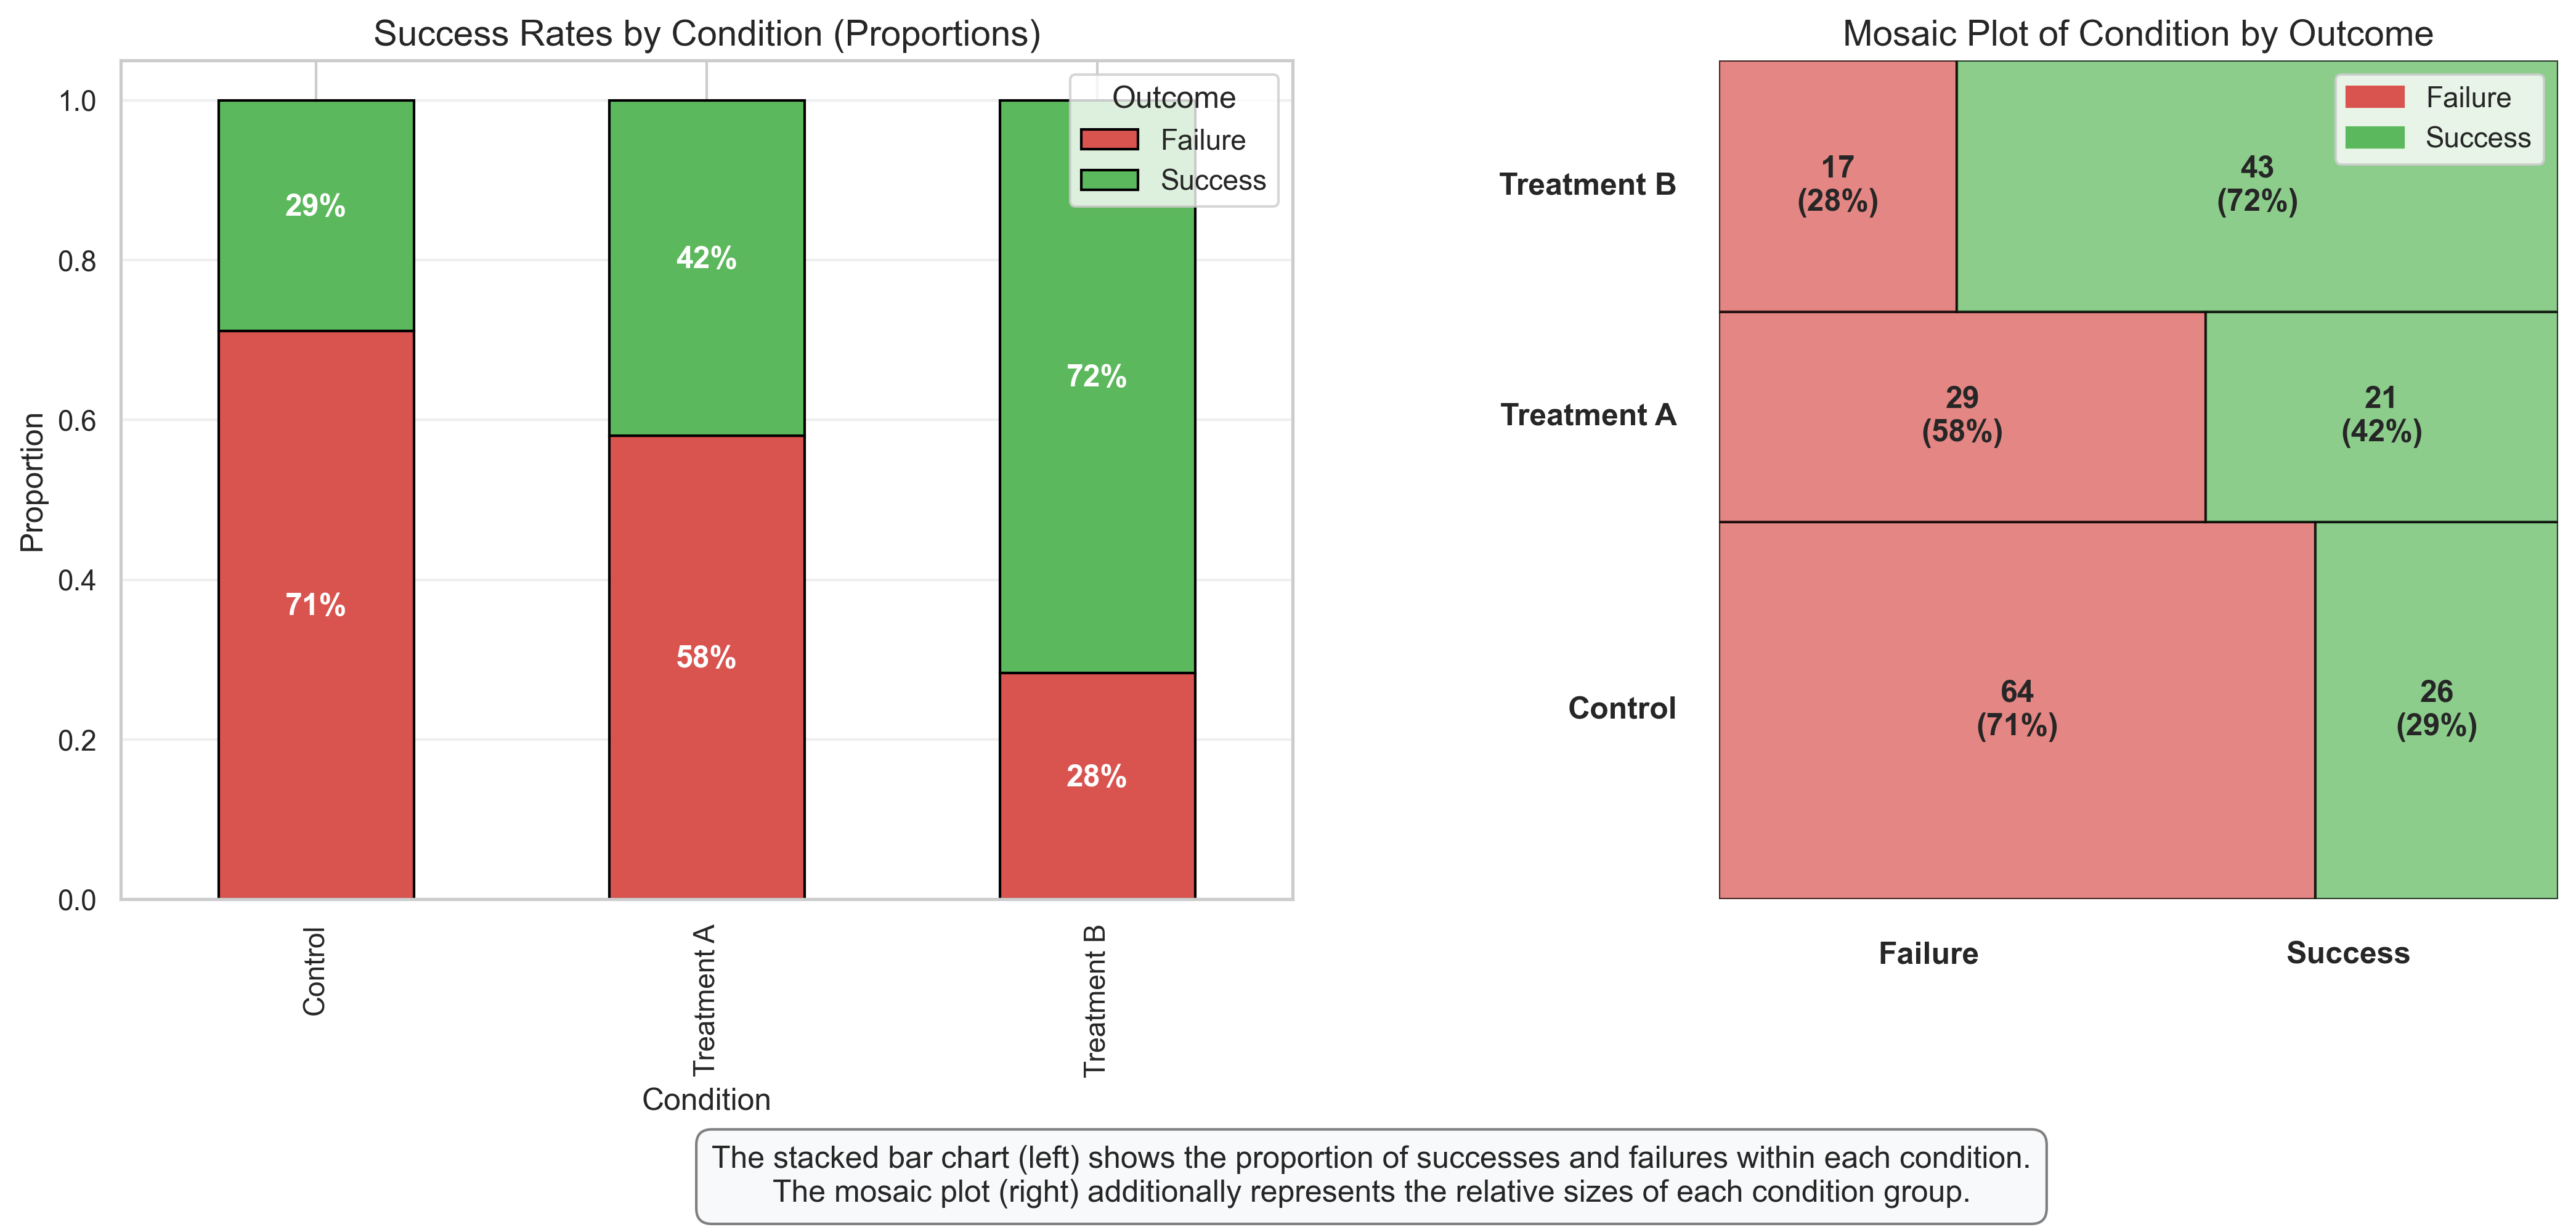

In [16]:
# Stacked Bar Chart and Mosaic Plot: Visualizing Contingency Tables
plt.figure(figsize=(15, 7))

# Calculate proportions for each condition
proportions = pd.crosstab(df_experiment['Condition'], df_experiment['Success'], normalize='index')

# Stacked Bar Chart
plt.subplot(1, 2, 1)
proportions.plot(kind='bar', stacked=True, color=['#d9534f', '#5cb85c'], 
                 edgecolor='black', ax=plt.gca())

# Add percentage labels
for i, condition in enumerate(proportions.index):
    # Label for False (failure)
    plt.text(i, proportions.loc[condition, False]/2, 
             f"{proportions.loc[condition, False]:.0%}", 
             ha='center', color='white', fontweight='bold')
    
    # Label for True (success)
    plt.text(i, proportions.loc[condition, False] + proportions.loc[condition, True]/2, 
             f"{proportions.loc[condition, True]:.0%}", 
             ha='center', color='white', fontweight='bold')

plt.title('Success Rates by Condition (Proportions)', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(['Failure', 'Success'], title='Outcome')
plt.grid(axis='y', alpha=0.3)

# Mosaic Plot (using contingency table)
plt.subplot(1, 2, 2)
counts_table = pd.crosstab(df_experiment['Condition'], df_experiment['Success'])
counts_table.columns = ['Failure', 'Success']  # Rename for clarity

# Create mosaic plot using matplotlib
from matplotlib import patches

# Calculate proportions for the mosaic plot
n_total = counts_table.sum().sum()
row_proportions = counts_table.sum(axis=1) / n_total  # Proportion of each condition
col_proportions_within_row = counts_table.div(counts_table.sum(axis=1), axis=0)  # Success/failure within each condition

# Plot rectangles
y_cumulative = 0
colors = ['#d9534f', '#5cb85c']  # Red for failure, green for success
for i, condition in enumerate(counts_table.index):
    height = row_proportions[condition]
    y_bottom = y_cumulative
    y_cumulative += height
    
    x_cumulative = 0
    for j, outcome in enumerate(counts_table.columns):
        width = col_proportions_within_row.loc[condition, outcome]
        rect = patches.Rectangle((x_cumulative, y_bottom), width, height, 
                                 edgecolor='black', facecolor=colors[j], alpha=0.7)
        plt.gca().add_patch(rect)
        
        # Add text label if rectangle is big enough
        if width * height > 0.05:  # Only label rectangles that are large enough
            plt.text(x_cumulative + width/2, y_bottom + height/2, 
                     f"{counts_table.loc[condition, outcome]}\n({width:.0%})", 
                     ha='center', va='center', fontweight='bold')
        
        x_cumulative += width
    
    # Add condition label on the y-axis
    plt.text(-0.05, y_bottom + height/2, condition, ha='right', va='center', fontweight='bold')

# Add outcome labels on the x-axis
plt.text(0.25, -0.05, 'Failure', ha='center', va='top', fontweight='bold')
plt.text(0.75, -0.05, 'Success', ha='center', va='top', fontweight='bold')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')  # Make the plot square
plt.gca().axis('off')  # Hide axes
plt.title('Mosaic Plot of Condition by Outcome', fontsize=14)

# Add legend
failure_patch = patches.Patch(color='#d9534f', label='Failure')
success_patch = patches.Patch(color='#5cb85c', label='Success')
plt.legend(handles=[failure_patch, success_patch], loc='upper right')

# Add explanatory text
plt.figtext(0.5, 0.01, "The stacked bar chart (left) shows the proportion of successes and failures within each condition.\n"
                      "The mosaic plot (right) additionally represents the relative sizes of each condition group.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Stacked Bar Chart and Mosaic Plot: Visualizing Contingency Tables

These visualizations are particularly useful for displaying the relationship between two categorical variables, in this case, experimental condition and outcome (success/failure).

**Stacked Bar Chart Interpretation:**

1. **Proportional View**: Each bar represents 100% of the participants in that condition, divided into the proportion who succeeded (green) and failed (red).

2. **Direct Comparison**: The chart makes it easy to compare success rates across conditions, showing the clear progression from Control (lowest success rate) to Treatment B (highest success rate).

3. **Percentage Labels**: The labels inside each segment show the exact percentages, making precise comparisons possible.

**Mosaic Plot Interpretation:**

1. **Area Representation**: The area of each rectangle is proportional to the count in that cell of the contingency table, providing a visual representation of both:
   - The relative sizes of each condition group (height of the rows)
   - The success/failure proportions within each condition (width of the segments)

2. **Complete Picture**: Unlike the stacked bar chart, the mosaic plot also shows the relative sample sizes of each condition, giving a more complete picture of the data.

3. **Count and Percentage Labels**: Each cell shows both the raw count and the percentage, providing both absolute and relative information.

**Research Applications:**
- These visualizations are ideal for analyzing and presenting the results of experiments with categorical outcomes
- They provide a clear way to visualize contingency tables, which are common in psychological research
- The mosaic plot is particularly useful when the sample sizes differ across conditions, as it represents this information visually

<Figure size 4200x2400 with 0 Axes>

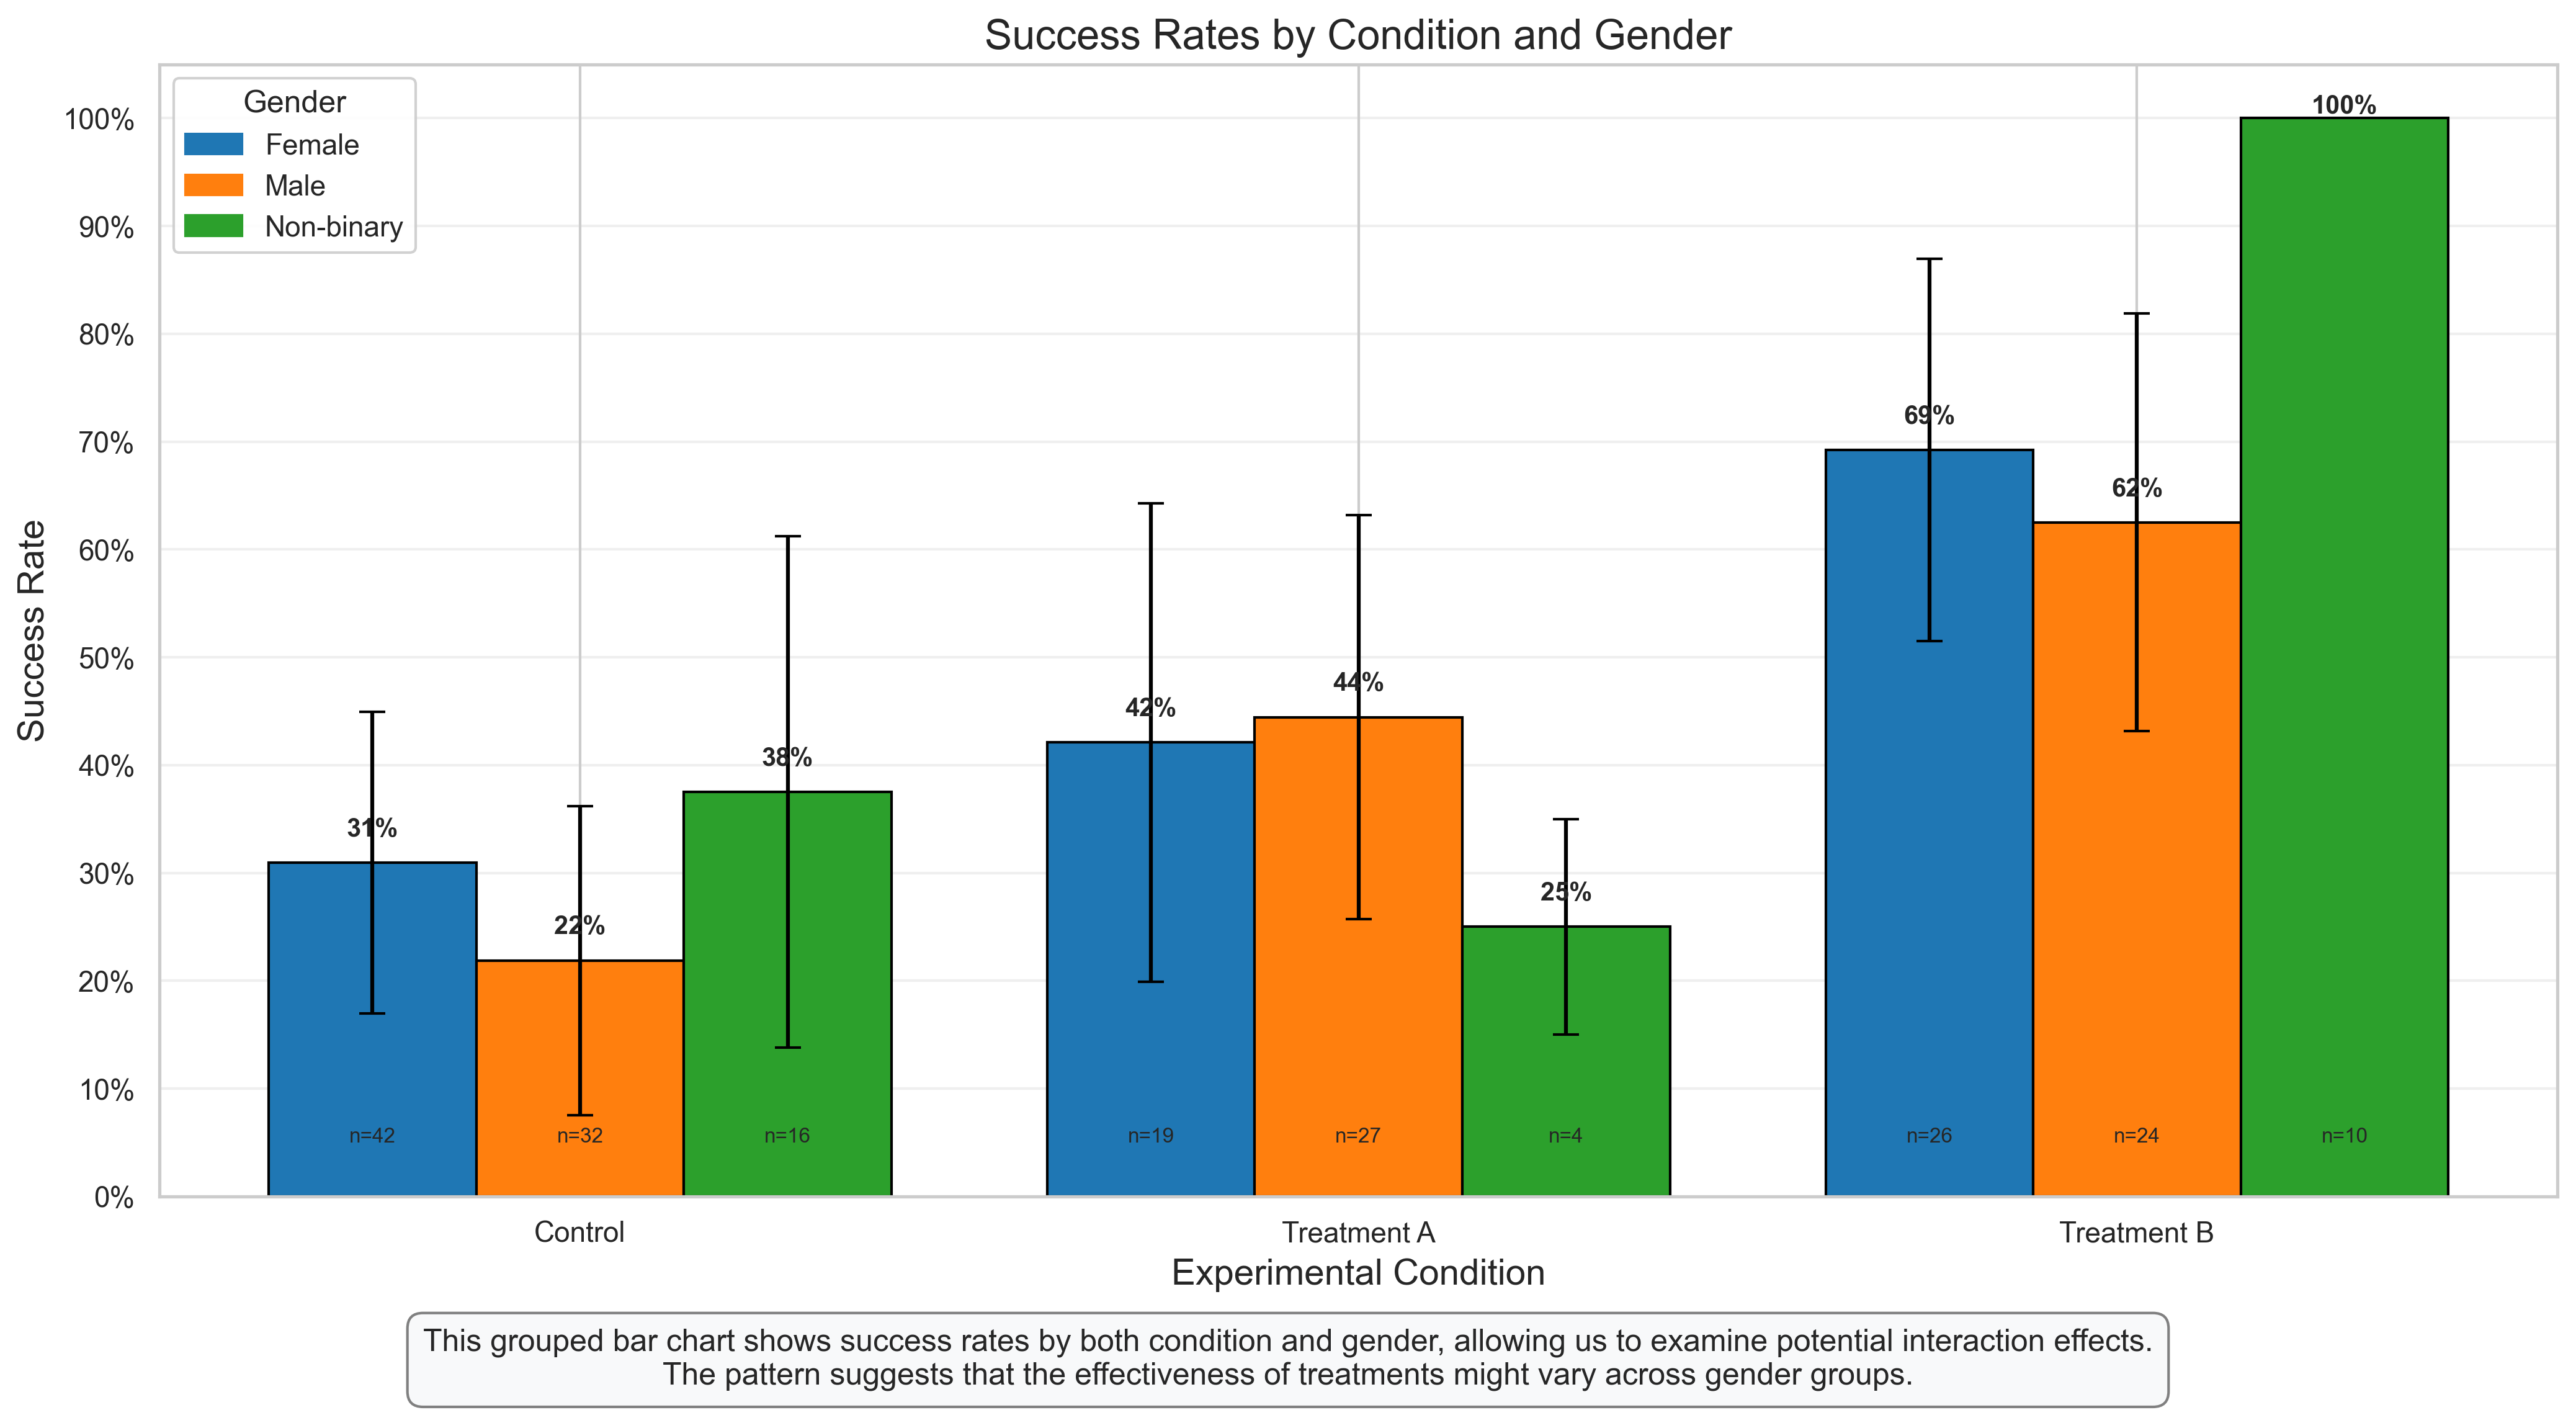

In [17]:
# Grouped Bar Chart: Examining Interactions
plt.figure(figsize=(14, 8))

# Calculate success rates by condition and gender
success_by_group = df_experiment.groupby(['Condition', 'Gender'])['Success'].agg(['mean', 'count'])
success_by_group['se'] = np.sqrt(success_by_group['mean'] * (1 - success_by_group['mean']) / success_by_group['count'])
success_by_group['ci'] = 1.96 * success_by_group['se']
success_by_group = success_by_group.reset_index()

# Instead of using seaborn's barplot, create our own grouped bar chart for more control
conditions = success_by_group['Condition'].unique()
genders = success_by_group['Gender'].unique()
n_conditions = len(conditions)
n_genders = len(genders)
width = 0.8 / n_genders  # Width of each bar

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Create a mapping of conditions and genders to positions
x_positions = {}
for i, condition in enumerate(conditions):
    for j, gender in enumerate(genders):
        x_positions[(condition, gender)] = i + (j - n_genders/2 + 0.5) * width

# Plot each bar manually
# Plot each bar manually
for i, row in success_by_group.iterrows():
    condition = row['Condition']
    gender = row['Gender']
    mean = row['mean']
    ci = row['ci']
    count = row['count']
    
    # Get color based on gender
    color = '#1f77b4' if gender == 'Female' else '#ff7f0e' if gender == 'Male' else '#2ca02c'
    
    # Plot the bar
    x_pos = x_positions[(condition, gender)]
    bar = ax.bar(x_pos, mean, width=width, color=color, edgecolor='black')
    
    # Add error bars - special handling for Non-binary in Treatment A and B
    if gender == 'Non-binary' and condition in ['Treatment A', 'Treatment B']:
        # For Non-binary in Treatment A, use smaller error bars
        if condition == 'Treatment A':
            yerr = min(0.1, ci)  # Limit to a small value
            ax.errorbar(x_pos, mean, yerr=yerr, fmt='none', color='black', capsize=5)
        # For Non-binary in Treatment B (100%), don't show error bars
        # No error bar code for Treatment B Non-binary
    else:
        # For all other combinations, use normal error bars with limits
        if mean < 0.99:  # Not 100%
            yerr_upper = min(ci, 1.0 - mean) if mean + ci > 1.0 else ci
            yerr_lower = min(ci, mean) if mean - ci < 0 else ci
            ax.errorbar(x_pos, mean, yerr=[[yerr_lower], [yerr_upper]], fmt='none', color='black', capsize=5)
    
    # Add value labels
    if mean > 0.05:
        if mean >= 0.99:
            ax.text(x_pos, 1.0, "100%", ha='center', va='bottom', fontsize=10, fontweight='bold')
        else:
            ax.text(x_pos, mean + 0.02, f'{mean:.0%}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add sample size
    ax.text(x_pos, 0.05, f'n={count}', ha='center', fontsize=8)

# Set x-ticks at the center of each group
ax.set_xticks(range(n_conditions))
ax.set_xticklabels(conditions)

# Add title and labels
ax.set_title('Success Rates by Condition and Gender', fontsize=16)
ax.set_xlabel('Experimental Condition', fontsize=14)
ax.set_ylabel('Success Rate', fontsize=14)
ax.set_ylim(0, 1.05)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{x:.0%}' for x in np.arange(0, 1.1, 0.1)])

# Add grid
ax.grid(axis='y', alpha=0.3)

# Add legend
legend_elements = [plt.Rectangle((0,0), 1, 1, color='#1f77b4', edgecolor='black', label='Female'),
                  plt.Rectangle((0,0), 1, 1, color='#ff7f0e', edgecolor='black', label='Male'),
                  plt.Rectangle((0,0), 1, 1, color='#2ca02c', edgecolor='black', label='Non-binary')]
ax.legend(handles=legend_elements, title='Gender', loc='upper left', frameon=True, framealpha=0.9)

# Add explanatory text
plt.figtext(0.5, 0.01, "This grouped bar chart shows success rates by both condition and gender, allowing us to examine potential interaction effects.\n"
                      "The pattern suggests that the effectiveness of treatments might vary across gender groups.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Grouped Bar Chart: Examining Interactions Between Variables

Grouped bar charts are excellent for visualizing potential interactions between categorical variables. In this case, we're examining how the effect of experimental condition on success rates might differ across gender groups.

**Key Features to Observe:**

1. **Group Comparisons**: Each condition has multiple bars representing different gender groups, allowing for direct comparison both within and across conditions.

2. **Error Bars**: The 95% confidence intervals help assess the statistical significance of differences between groups.

3. **Value Labels**: The percentage labels on each bar provide exact success rates, while the sample size (n) at the bottom indicates how many participants were in each subgroup.

4. **Interaction Patterns**: The different patterns across gender groups within each condition suggest a potential interaction effect.

**Psychological Interpretation:**

This visualization reveals several interesting patterns:

- **Main Effect of Condition**: Across all gender groups, there's a general trend of increasing success rates from Control to Treatment B.

- **Main Effect of Gender**: There appear to be some differences in overall success rates between gender groups.

- **Interaction Effect**: The magnitude of treatment effects (difference between conditions) appears to vary across gender groups, suggesting a potential interaction. For example, Treatment B might be particularly effective for one gender group compared to others.

**Research Applications:**
- Grouped bar charts are essential for visualizing factorial experimental designs in psychology
- They help researchers identify potential interaction effects that might be missed when examining main effects alone
- They provide a more nuanced understanding of how treatments or interventions might work differently for different demographic groups

## 5. Advanced Visualization Techniques

Let's explore some more advanced visualization techniques that can be particularly useful for psychological data.

In [18]:
# Generate data for a longitudinal study
np.random.seed(42)
n_participants = 50
n_timepoints = 4

# Create participant IDs
participant_ids = [f'P{i:03d}' for i in range(1, n_participants + 1)]

# Create treatment groups
treatment = np.random.choice(['Control', 'Treatment'], size=n_participants)

# Create time points
timepoints = ['Baseline', 'Week 4', 'Week 8', 'Week 12']

# Create scores with different trajectories for each group
# Control group: slight improvement
# Treatment group: substantial improvement
data = []
for i, pid in enumerate(participant_ids):
    # Set baseline score (random between 20-30)
    baseline = np.random.uniform(20, 30)
    
    # Set improvement rate based on treatment group
    if treatment[i] == 'Control':
        improvement_rate = 1  # Points per timepoint
        variability = 2       # Random noise
    else:  # Treatment group
        improvement_rate = 3  # Points per timepoint
        variability = 2       # Random noise
    
    # Generate scores for each timepoint
    for t, timepoint in enumerate(timepoints):
        score = baseline + improvement_rate * t + np.random.normal(0, variability)
        data.append({
            'Participant': pid,
            'Treatment': treatment[i],
            'Timepoint': timepoint,
            'Time': t,  # Numeric time for modeling
            'Score': score
        })

# Create DataFrame
df_longitudinal = pd.DataFrame(data)

# Calculate summary statistics by group and timepoint
summary = df_longitudinal.groupby(['Treatment', 'Timepoint'])['Score'].agg(['mean', 'std', 'count'])
summary['se'] = summary['std'] / np.sqrt(summary['count'])  # Standard error
summary['ci'] = 1.96 * summary['se']  # 95% confidence interval
print("Summary Statistics:")
print(summary)

Summary Statistics:
                          mean       std  count        se        ci
Treatment Timepoint                                                
Control   Baseline   25.429055  3.926952     23  0.818826  1.604899
          Week 12    28.655131  3.782920     23  0.788793  1.546035
          Week 4     26.520616  3.732002     23  0.778176  1.525225
          Week 8     27.129017  3.790645     23  0.790404  1.549192
Treatment Baseline   24.641017  3.576780     27  0.688352  1.349169
          Week 12    33.375173  3.885728     27  0.747809  1.465705
          Week 4     28.049860  4.273222     27  0.822382  1.611868
          Week 8     30.426201  3.033725     27  0.583841  1.144328


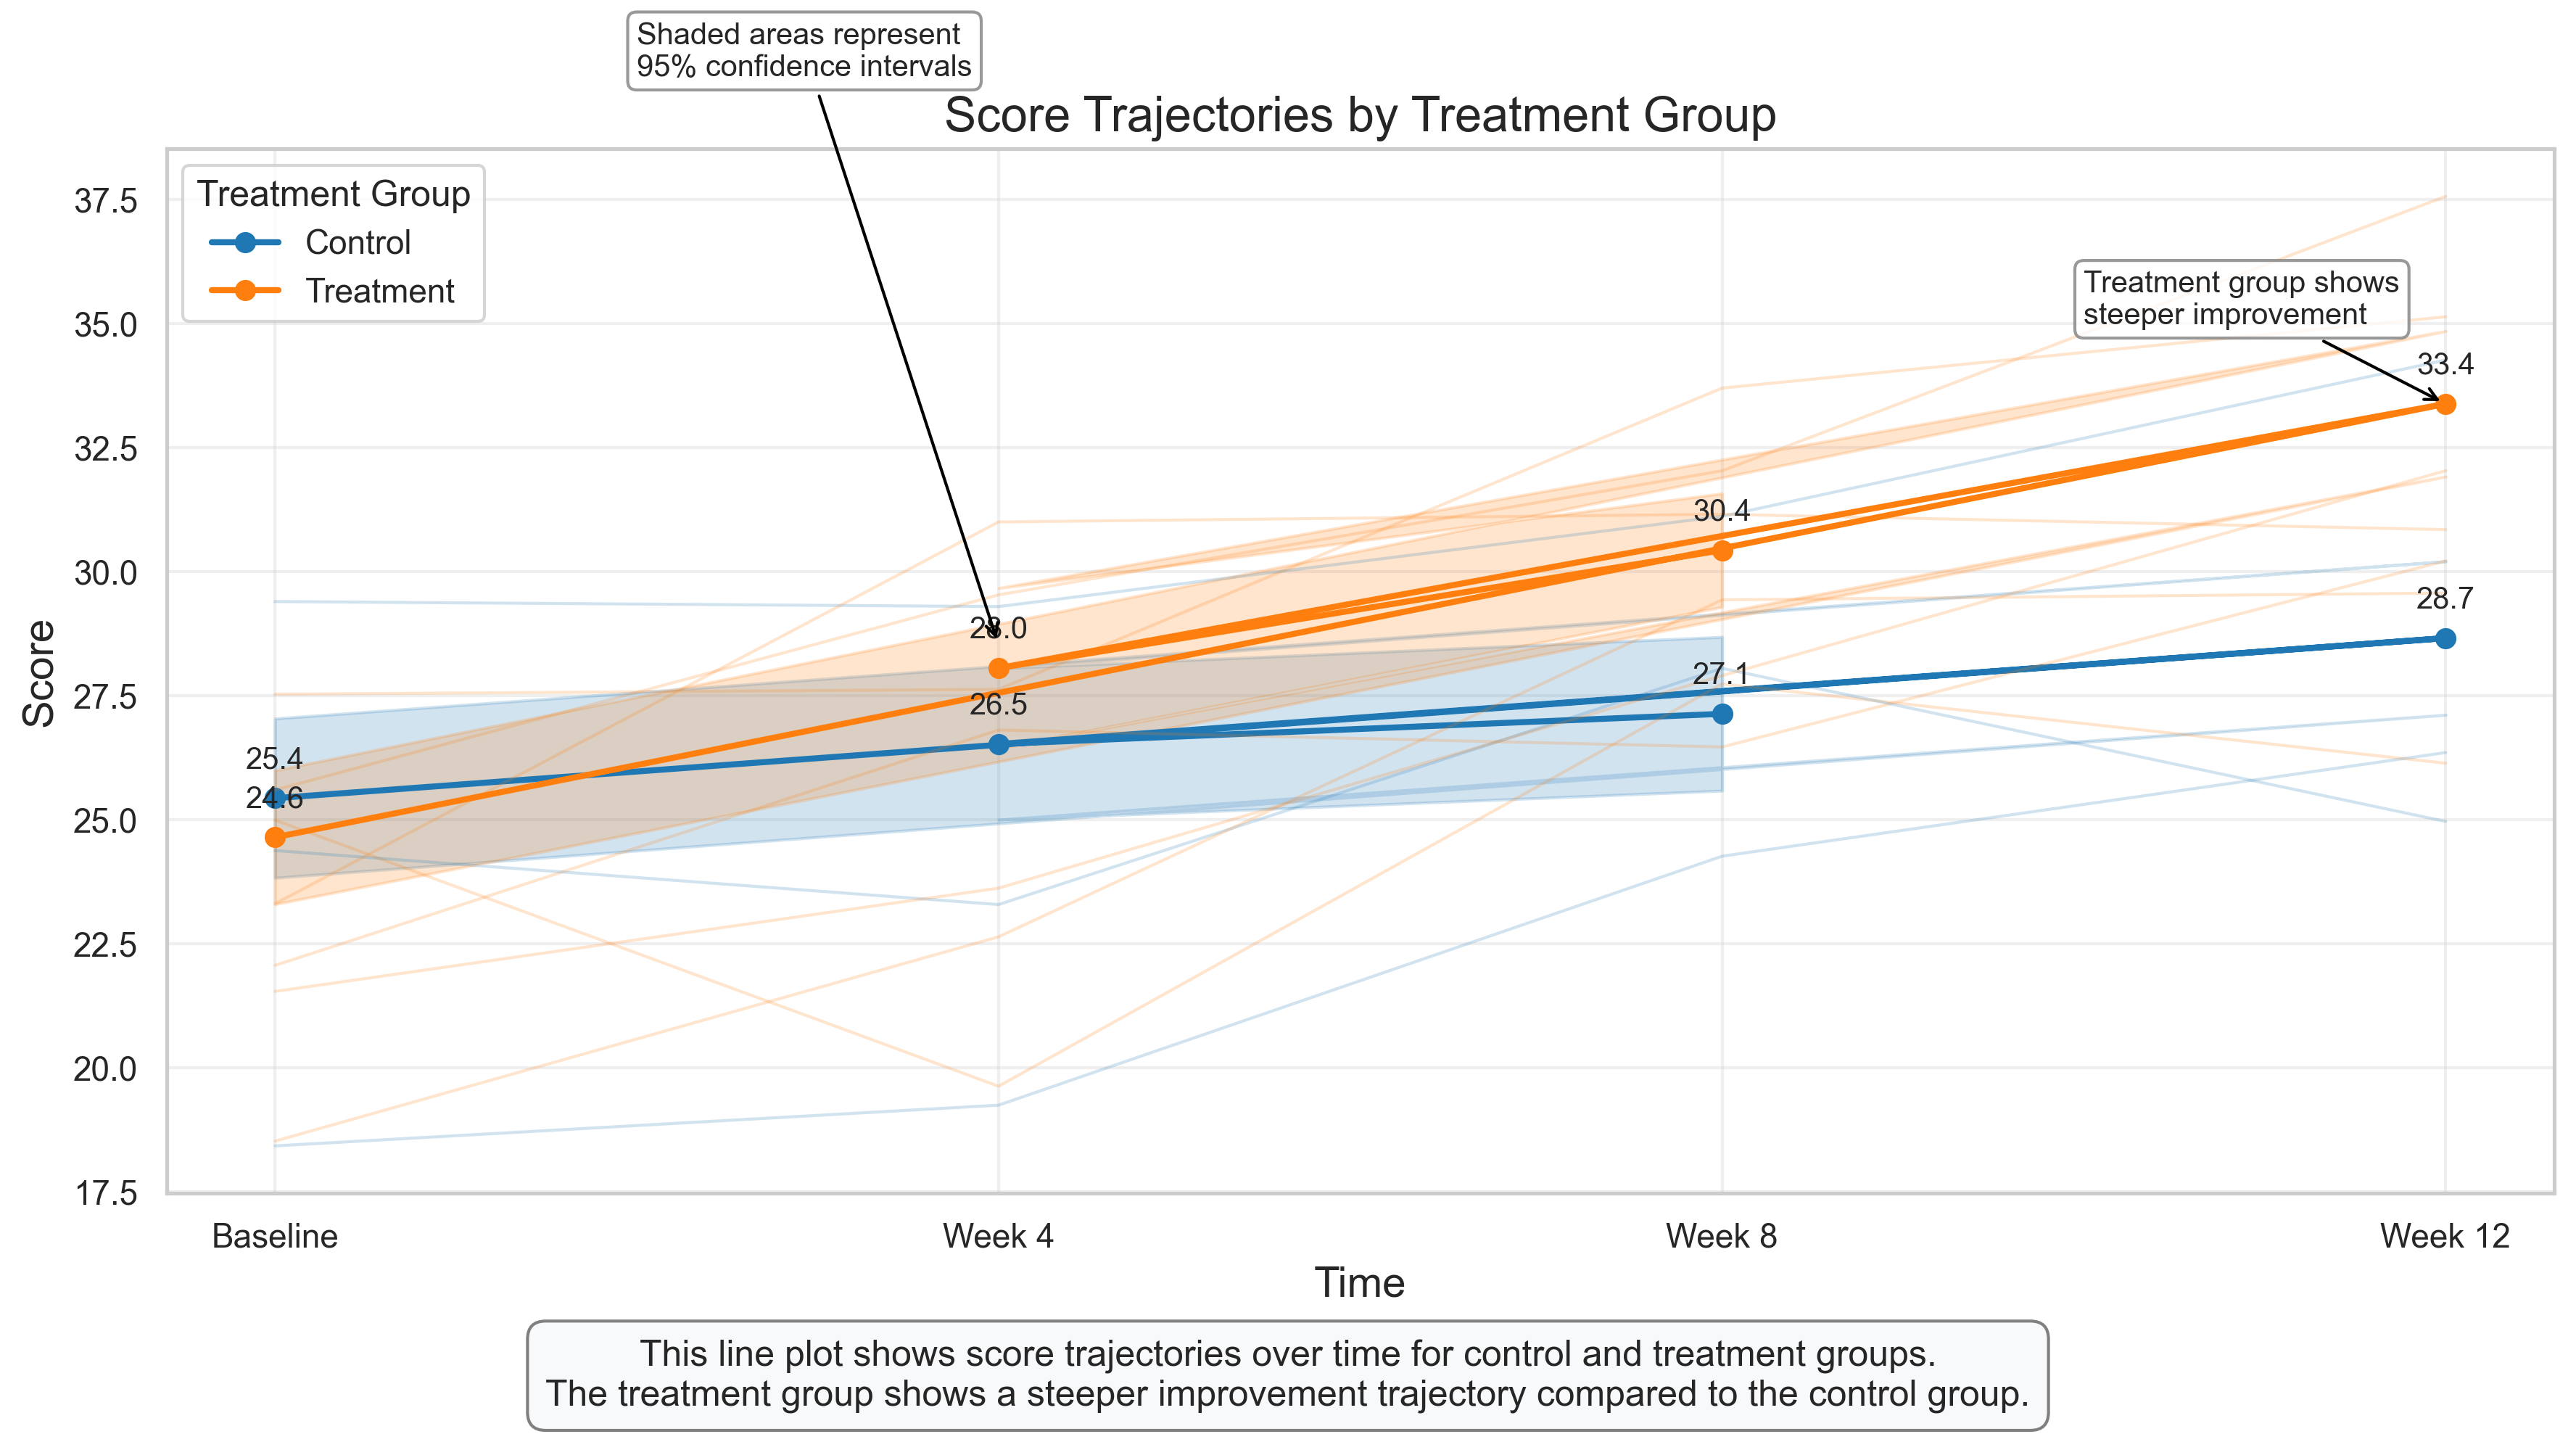

In [19]:
# Line Plot with Confidence Intervals: Visualizing Longitudinal Data
plt.figure(figsize=(12, 7))

# Prepare data for plotting
summary_reset = summary.reset_index()

# Create numeric time points for x-axis
time_mapping = {tp: i for i, tp in enumerate(timepoints)}
summary_reset['Time_Numeric'] = summary_reset['Timepoint'].map(time_mapping)

# Plot lines for each treatment group
for treatment_group, color in zip(['Control', 'Treatment'], ['#1f77b4', '#ff7f0e']):
    group_data = summary_reset[summary_reset['Treatment'] == treatment_group]
    
    # Plot the mean line
    plt.plot(group_data['Time_Numeric'], group_data['mean'], marker='o', color=color, 
             linewidth=2, label=treatment_group)
    
    # Add confidence interval shading
    plt.fill_between(group_data['Time_Numeric'], 
                     group_data['mean'] - group_data['ci'],
                     group_data['mean'] + group_data['ci'],
                     color=color, alpha=0.2)
    
    # Add value labels
    for i, row in group_data.iterrows():
        plt.text(row['Time_Numeric'], row['mean'] + 0.5, 
                 f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=10)

# Add individual participant trajectories with low opacity
for pid in np.random.choice(participant_ids, 10, replace=False):  # Show a random subset of participants
    participant_data = df_longitudinal[df_longitudinal['Participant'] == pid]
    treatment_group = participant_data['Treatment'].iloc[0]
    color = '#1f77b4' if treatment_group == 'Control' else '#ff7f0e'
    plt.plot(participant_data['Time'], participant_data['Score'], 
             color=color, alpha=0.2, linewidth=1)

# Add title and labels
plt.title('Score Trajectories by Treatment Group', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(range(len(timepoints)), timepoints)
plt.grid(alpha=0.3)
plt.legend(title='Treatment Group')

# Add annotations
plt.annotate('Treatment group shows\nsteeper improvement', 
             xy=(3, summary_reset[(summary_reset['Treatment'] == 'Treatment') & 
                                 (summary_reset['Timepoint'] == 'Week 12')]['mean'].values[0]),
             xytext=(2.5, 35), 
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.annotate('Shaded areas represent\n95% confidence intervals', 
             xy=(1, summary_reset[(summary_reset['Treatment'] == 'Control') & 
                                 (summary_reset['Timepoint'] == 'Week 4')]['mean'].values[0] + 2),
             xytext=(0.5, 40), 
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "This line plot shows score trajectories over time for control and treatment groups.\n"
                      "The treatment group shows a steeper improvement trajectory compared to the control group.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Line Plot with Confidence Intervals: Visualizing Longitudinal Data

Line plots are ideal for visualizing changes over time, making them perfect for longitudinal studies that are common in psychological research. This visualization shows how scores change over time for two treatment groups.

**Key Features to Observe:**

1. **Group Trajectories**: The solid lines with markers show the mean scores for each group at each time point, allowing us to compare the trajectories.

2. **Confidence Intervals**: The shaded areas represent 95% confidence intervals around the means, indicating the precision of our estimates and allowing for statistical inference.

3. **Individual Trajectories**: The faint lines in the background show a subset of individual participant trajectories, providing insight into individual variability within each group.

4. **Value Labels**: The numeric labels at each time point show the exact mean scores, facilitating precise comparisons.

**Psychological Interpretation:**

This visualization reveals several important patterns:

- **Different Trajectories**: While both groups show improvement over time, the treatment group demonstrates a steeper trajectory, suggesting the treatment accelerates improvement.

- **Group Separation**: The confidence intervals begin to separate after the baseline, indicating a statistically significant difference between groups emerging over time.

- **Individual Variability**: The individual trajectories show considerable variability within each group, highlighting that while the treatment is effective on average, individual responses vary.

**Research Applications:**
- Line plots with confidence intervals are standard for visualizing longitudinal data in psychological research
- They are particularly useful for clinical trials, developmental studies, and any research examining change over time
- Including both group averages and individual trajectories provides a more complete picture of the data, balancing between group-level effects and individual differences

<Figure size 3600x3000 with 0 Axes>

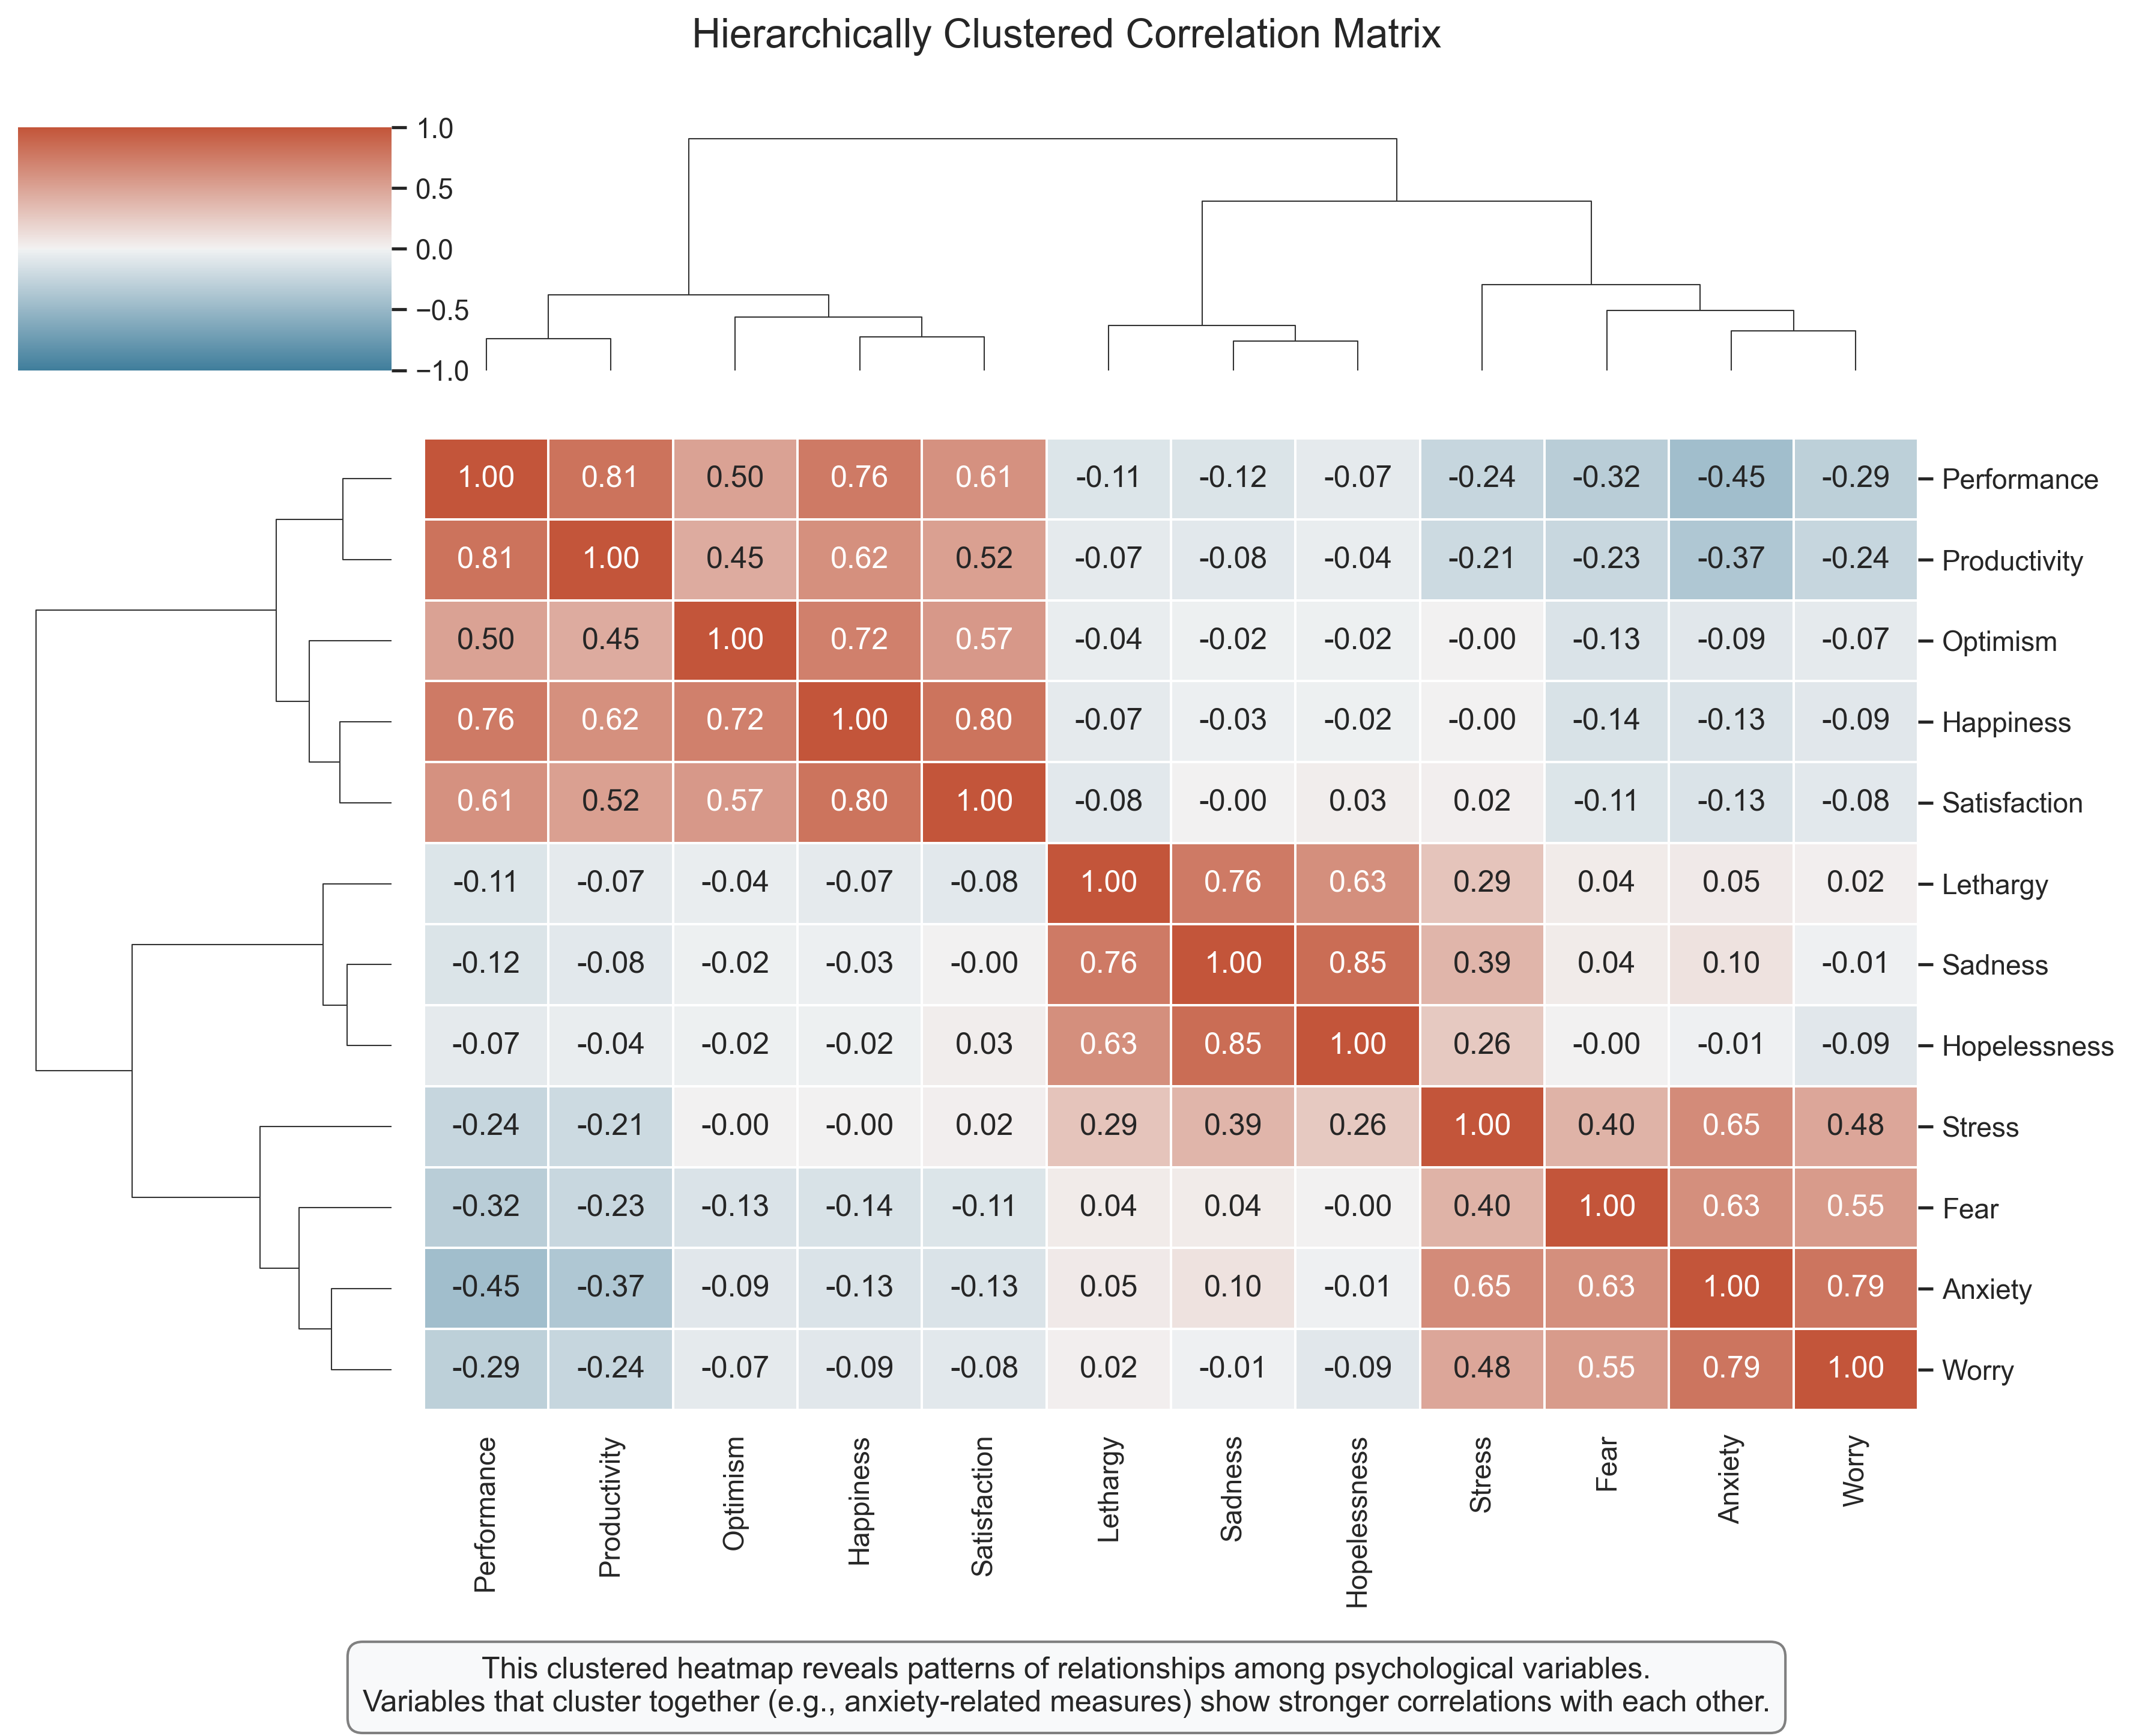

In [20]:
# Heatmap for Correlation Matrix with Hierarchical Clustering
plt.figure(figsize=(12, 10))

# Generate a larger correlation matrix with clustered variables
np.random.seed(42)
n_variables = 12
n_samples = 200

# Create variable names
var_names = [
    'Anxiety', 'Worry', 'Fear', 'Stress',  # Anxiety cluster
    'Sadness', 'Lethargy', 'Hopelessness',  # Depression cluster
    'Happiness', 'Satisfaction', 'Optimism',  # Wellbeing cluster
    'Performance', 'Productivity'  # Performance cluster
]

# Create base variables for each cluster
anxiety_base = np.random.normal(0, 1, n_samples)
depression_base = np.random.normal(0, 1, n_samples)
wellbeing_base = np.random.normal(0, 1, n_samples)
performance_base = wellbeing_base * 0.6 - anxiety_base * 0.4 + np.random.normal(0, 0.5, n_samples)

# Create correlated variables
data = {}
# Anxiety cluster
data['Anxiety'] = anxiety_base
data['Worry'] = anxiety_base * 0.8 + np.random.normal(0, 0.6, n_samples)
data['Fear'] = anxiety_base * 0.7 + np.random.normal(0, 0.7, n_samples)
data['Stress'] = anxiety_base * 0.6 + depression_base * 0.3 + np.random.normal(0, 0.6, n_samples)

# Depression cluster
data['Sadness'] = depression_base
data['Lethargy'] = depression_base * 0.75 + np.random.normal(0, 0.65, n_samples)
data['Hopelessness'] = depression_base * 0.85 + np.random.normal(0, 0.55, n_samples)

# Wellbeing cluster
data['Happiness'] = wellbeing_base
data['Satisfaction'] = wellbeing_base * 0.8 + np.random.normal(0, 0.6, n_samples)
data['Optimism'] = wellbeing_base * 0.7 + np.random.normal(0, 0.7, n_samples)

# Performance cluster
data['Performance'] = performance_base
data['Productivity'] = performance_base * 0.85 + np.random.normal(0, 0.55, n_samples)

# Create DataFrame
df_psych_large = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df_psych_large.corr().round(2)

# Perform hierarchical clustering
from scipy.cluster import hierarchy
from scipy.spatial import distance

# Calculate distance matrix
corr_condensed = distance.squareform(1 - np.abs(corr_matrix))
z = hierarchy.linkage(corr_condensed, method='average')
# Get the order of variables for the clustered heatmap
idx = hierarchy.dendrogram(z, no_plot=True)['leaves']

# Reorder the correlation matrix
corr_clustered = corr_matrix.iloc[idx, idx]

# Create clustered heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Red-blue diverging colormap
sns.clustermap(corr_matrix, method='average', cmap=cmap, vmax=1, vmin=-1, center=0,
               square=True, linewidths=.5, annot=True, fmt='.2f', 
               cbar_kws={"shrink": .8}, figsize=(12, 10))

plt.suptitle('Hierarchically Clustered Correlation Matrix', fontsize=16, y=0.95)

# Add explanatory text
plt.figtext(0.5, 0.01, "This clustered heatmap reveals patterns of relationships among psychological variables.\n"
                      "Variables that cluster together (e.g., anxiety-related measures) show stronger correlations with each other.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### Hierarchically Clustered Heatmap: Revealing Variable Relationships

A clustered heatmap combines correlation visualization with hierarchical clustering, helping to identify groups of related variables. This is particularly useful in psychological research where we often measure multiple related constructs.

**Key Features to Observe:**

1. **Color Coding**: As in the earlier correlation heatmap, blue indicates positive correlations, red indicates negative correlations, and the intensity represents the strength.

2. **Hierarchical Clustering**: The dendrogram on the sides shows how variables cluster together based on their correlation patterns. Variables that are more similar (more highly correlated) are placed closer together.

3. **Variable Clusters**: The visualization reveals clear clusters of related variables, such as anxiety-related measures, depression-related measures, wellbeing measures, and performance measures.

4. **Cross-Cluster Relationships**: The heatmap also shows relationships between clusters, such as the negative correlations between wellbeing measures and depression measures.

**Psychological Interpretation:**

This visualization reveals several psychologically meaningful patterns:

- **Construct Validity**: Variables that theoretically measure the same construct (e.g., different aspects of anxiety) cluster together, providing evidence of construct validity.

- **Discriminant Validity**: The clear separation between clusters (e.g., anxiety vs. wellbeing) provides evidence of discriminant validity – these measures are capturing distinct constructs.

- **Theoretical Relationships**: The pattern of correlations between clusters aligns with psychological theory – for example, the negative relationship between wellbeing and depression measures.

**Research Applications:**
- Clustered heatmaps are valuable for exploring the structure of psychological measures
- They can inform the development and validation of psychological assessment instruments
- They provide a visual foundation for more complex analyses like factor analysis or structural equation modeling
- They help researchers identify potential redundancy in their measurement approach

## 6. Principles of Effective Data Visualization

To conclude this chapter, let's discuss some key principles for creating effective data visualizations in psychological research:

### 1. Choose the Right Visualization for Your Data and Question

- **Distribution of a single variable**: Histograms, density plots, box plots, violin plots
- **Relationship between two continuous variables**: Scatter plots, line plots (for time series)
- **Comparison across categories**: Bar charts, box plots, violin plots
- **Proportions or contingency tables**: Stacked bar charts, mosaic plots, pie charts (use sparingly)
- **Multiple relationships**: Correlation matrices, pair plots, network graphs
- **Change over time**: Line plots, area charts

### 2. Prioritize Clarity and Accuracy

- **Start y-axis at zero** for bar charts to avoid visual distortion
- **Use appropriate scales** that neither exaggerate nor minimize differences
- **Include error bars or confidence intervals** to represent uncertainty
- **Label axes clearly** with units of measurement
- **Use color consistently and meaningfully**, not just for decoration
- **Avoid 3D effects** and other chartjunk that can distort perception

### 3. Make Your Visualizations Accessible

- **Use colorblind-friendly palettes** (avoid red-green combinations)
- **Include text labels** for important data points
- **Ensure sufficient contrast** between elements
- **Use patterns or shapes** in addition to color when necessary
- **Consider how the visualization will appear in black and white** if printed

### 4. Tell a Clear Story

- **Include informative titles** that highlight the main finding
- **Add annotations** to draw attention to key patterns or outliers
- **Order categories logically** (e.g., chronologically, by magnitude) rather than alphabetically
- **Use faceting or small multiples** to compare across multiple dimensions
- **Consider the audience's familiarity** with the visualization type and subject matter

### 5. Be Transparent and Ethical

- **Show the full context** of your data, not just the parts that support your hypothesis
- **Avoid cherry-picking** time periods or subgroups
- **Acknowledge limitations** in the data or visualization
- **Consider showing raw data** alongside summary statistics when possible
- **Be cautious with causality claims** based on correlational data

By following these principles, you can create visualizations that effectively communicate your findings, facilitate understanding, and maintain scientific integrity.

## Summary

In this chapter, we've explored a wide range of data visualization techniques that are particularly useful for psychological research:

1. **Distribution Visualizations**: Histograms, box plots, violin plots, and Q-Q plots for understanding the shape, center, and spread of variables.

2. **Relationship Visualizations**: Scatter plots, correlation matrices, and pair plots for examining relationships between continuous variables.

3. **Categorical Data Visualizations**: Bar charts, stacked bar charts, and mosaic plots for visualizing categorical variables and contingency tables.

4. **Advanced Techniques**: Line plots with confidence intervals for longitudinal data and hierarchically clustered heatmaps for exploring variable structures.

We've also discussed key principles for creating effective, accurate, and ethical data visualizations.

Remember that visualization is both a science and an art. The scientific aspect ensures that your visualizations accurately represent the data, while the artistic aspect helps make your visualizations engaging and clear. By mastering both aspects, you can create visualizations that not only support your own data analysis but also effectively communicate your findings to others.

In the next chapter, we'll build on these visualization skills as we explore statistical inference, which allows us to draw conclusions about populations based on sample data.

## Practice Problems

1. Using the depression scores dataset from this chapter, create a visualization that compares the distributions of scores for males and females using a method different from what was shown in the chapter.

2. Create a visualization that shows the relationship between anxiety and performance, but also incorporates a third variable (e.g., gender, age group) using color, shape, or faceting.

3. For the experimental data with conditions and success/failure outcomes, create a visualization that shows both the raw counts and the proportions in each cell of the contingency table.

4. Using the longitudinal data, create a visualization that focuses on individual trajectories rather than group averages. How might you organize or color the trajectories to reveal patterns?

5. Design a visualization that would be effective for communicating the results of the anxiety-performance study to:
   a. A scientific audience in a journal article
   b. A general audience in a news article
   c. Participants in the study
   
   How would your visualization choices differ for each audience, and why?

6. Find a published psychology paper that includes data visualizations. Critically evaluate one of the visualizations using the principles discussed in this chapter. How might you improve it?

7. Create a visualization for a dataset of your choice that deliberately violates one or more principles of good visualization. Then create an improved version that corrects these issues. Explain the differences and why the improved version is more effective.

8. For the correlation matrix of psychological variables, create an alternative visualization that shows the same information but in a different format (e.g., a network graph where variables are nodes and correlations are edges).

9. Design a dashboard with multiple visualizations that together tell a comprehensive story about one of the datasets from this chapter. Consider how the visualizations complement each other and what insights emerge from viewing them together.

10. Choose a complex psychological construct (e.g., intelligence, personality, mental health) and design a visualization that could effectively communicate its multidimensional nature to students new to psychology.

## Exercises

### Exercise 1: Comparing Distributions

Using the code below as a starting point, create a ridgeline plot (also known as a joyplot) to compare the distributions of depression scores by gender.

In [21]:
# Starting code for Exercise 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data for depression scores
n_participants = 200
depression_scores = np.random.gamma(shape=5, scale=2, size=n_participants)

# Create a DataFrame
df_depression = pd.DataFrame({
    'Depression Score': depression_scores,
    'Gender': np.random.choice(['Male', 'Female'], size=n_participants, p=[0.45, 0.55])
})

# Your code for creating a ridgeline plot goes here
# Hint: You may need to install the joypy package: pip install joypy
# Or use matplotlib's fill_between function to create a similar effect

### Exercise 2: Visualizing Relationships with Multiple Variables

Using the code below as a starting point, create a scatter plot that shows the relationship between anxiety and performance, with points colored by gender and shaped by age group. Include a regression line for each gender.

In [22]:
# Starting code for Exercise 2
# Generate sample data
n_participants = 100

# Create anxiety scores
anxiety_scores = np.random.normal(loc=5, scale=2, size=n_participants)

# Create performance scores with a negative relationship to anxiety plus some noise
noise = np.random.normal(loc=0, scale=15, size=n_participants)
performance_scores = 100 - 3 * anxiety_scores + noise

# Create categorical variables
gender = np.random.choice(['Male', 'Female'], size=n_participants)
age_group = np.random.choice(['18-25', '26-40', '41+'], size=n_participants)

# Create a DataFrame
df_anxiety = pd.DataFrame({
    'Anxiety': anxiety_scores,
    'Performance': performance_scores,
    'Gender': gender,
    'Age Group': age_group
})

# Your code for creating a scatter plot with multiple variables goes here

### Exercise 3: Creating an Interactive Visualization

Using the code below as a starting point, create an interactive visualization of the longitudinal data using a library like Plotly. Allow users to hover over points to see details and toggle different groups on and off.

In [23]:
# Starting code for Exercise 3
# Generate data for a longitudinal study
np.random.seed(42)
n_participants = 50
n_timepoints = 4

# Create participant IDs
participant_ids = [f'P{i:03d}' for i in range(1, n_participants + 1)]

# Create treatment groups
treatment = np.random.choice(['Control', 'Treatment'], size=n_participants)

# Create time points
timepoints = ['Baseline', 'Week 4', 'Week 8', 'Week 12']

# Create scores with different trajectories for each group
data = []
for i, pid in enumerate(participant_ids):
    # Set baseline score (random between 20-30)
    baseline = np.random.uniform(20, 30)
    
    # Set improvement rate based on treatment group
    if treatment[i] == 'Control':
        improvement_rate = 1  # Points per timepoint
        variability = 2       # Random noise
    else:  # Treatment group
        improvement_rate = 3  # Points per timepoint
        variability = 2       # Random noise
    
    # Generate scores for each timepoint
    for t, timepoint in enumerate(timepoints):
        score = baseline + improvement_rate * t + np.random.normal(0, variability)
        data.append({
            'Participant': pid,
            'Treatment': treatment[i],
            'Timepoint': timepoint,
            'Time': t,  # Numeric time for modeling
            'Score': score
        })

# Create DataFrame
df_longitudinal = pd.DataFrame(data)

# Your code for creating an interactive visualization goes here
# Hint: You may need to install plotly: pip install plotly

### Exercise 4: Creating a Custom Visualization

Design and implement a custom visualization that effectively communicates a key finding from one of the datasets in this chapter. Be creative and consider using techniques or approaches not covered in the main content.

In [24]:
# Your code for creating a custom visualization goes here
# You can use any of the datasets from this chapter or create your own